## 1 - Packages

Let's first import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the main package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- dnn_utils provides some necessary functions for this notebook.
- testCases provides some test cases to assess the correctness of your functions
- np.random.seed(1) is used to keep all the random function calls consistent. It will help us grade your work. Please don't change the seed. 

In [2]:
import numpy as np
import h5py
import math
import matplotlib.pyplot as plt
import scipy

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print("scipy version: {}".format(scipy.__version__))  

scipy version: 1.4.1


## 2 - Outline of the Assignment

To build your neural network, you will be implementing several "helper functions". These helper functions will be used in the next assignment to build a two-layer neural network and an L-layer neural network. Each small helper function you will implement will have detailed instructions that will walk you through the necessary steps. Here is an outline of this assignment, you will:

- Initialize the parameters for a two-layer network and for an $L$-layer neural network.
- Implement the forward propagation module (shown in purple in the figure below).
     - Complete the LINEAR part of a layer's forward propagation step (resulting in $Z^{[l]}$).
     - We give you the ACTIVATION function (relu/sigmoid).
     - Combine the previous two steps into a new [LINEAR->ACTIVATION] forward function.
     - Stack the [LINEAR->RELU] forward function L-1 time (for layers 1 through L-1) and add a [LINEAR->SIGMOID] at the end (for the final layer $L$). This gives you a new L_model_forward function.
- Compute the loss.
- Implement the backward propagation module (denoted in red in the figure below).
    - Complete the LINEAR part of a layer's backward propagation step.
    - We give you the gradient of the ACTIVATE function (relu_backward/sigmoid_backward) 
    - Combine the previous two steps into a new [LINEAR->ACTIVATION] backward function.
    - Stack [LINEAR->RELU] backward L-1 times and add [LINEAR->SIGMOID] backward in a new L_model_backward function
- Finally update the parameters.

<img src="images/final outline.png" style="width:800px;height:500px;">
<caption><center> **Figure 1**</center></caption><br>


**Note** that for every forward function, there is a corresponding backward function. That is why at every step of your forward module you will be storing some values in a cache. The cached values are useful for computing gradients. In the backpropagation module you will then use the cache to calculate the gradients. This assignment will show you exactly how to carry out each of these steps. 

In [36]:

def initialize_parameters_deep(L, layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(1)
    parameters = {}
    v = {}
    s = {}
    
    for l in range(1, L+1):
        mean = 0.
        if l == L+1: #Sigmoid
            sigma = np.sqrt(2.0/(layer_dims[l] + layer_dims[l-1]))
        else: #Relu
            sigma = np.sqrt(2.0/layer_dims[l-1])
        parameters['W' + str(l)] = np.random.normal(mean, sigma, size=(layer_dims[l], layer_dims[l-1])) 
        #parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        v["dW" + str(l)] = np.zeros (parameters['W' + str(l)].shape)
        v["db" + str(l)] = np.zeros (parameters['b' + str(l)].shape)
        s["dW" + str(l)] = np.zeros (parameters['W' + str(l)].shape)
        s["db" + str(l)] = np.zeros (parameters['b' + str(l)].shape)
        
        print(str('W' + str(l)) + str(parameters['W' + str(l)].shape))
        print(str('W' + str(l)) + str(parameters['W' + str(l)].dtype))
        print(str('vdW' + str(l)) + str(v['dW' + str(l)].shape))
        print(str('vdW' + str(l)) + str(v['dW' + str(l)].dtype))
        print(str('sdW' + str(l)) + str(s['dW' + str(l)].shape))
        print(str('sdW' + str(l)) + str(s['dW' + str(l)].dtype))
        print(str('b' + str(l)) + str(parameters['b' + str(l)].shape))
        print(str('b' + str(l)) + str(parameters['b' + str(l)].dtype))
        print(str('vdb' + str(l)) + str(v['db' + str(l)].shape))
        print(str('vdb' + str(l)) + str(v['db' + str(l)].dtype))
        print(str('sdb' + str(l)) + str(s['db' + str(l)].shape))
        print(str('sdb' + str(l)) + str(s['db' + str(l)].dtype))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
        assert(v['dW' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(v['db' + str(l)].shape == (layer_dims[l], 1))
        assert(s['dW' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(s['db' + str(l)].shape == (layer_dims[l], 1))
        
    return parameters, v, s

In [37]:
np.random.seed(1)
mean = 0
sigma = np.sqrt(2/2)
r = np.random.normal( mean, sigma, size=(2, 3)) 
print (r)

[[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]


In [38]:
parameters, v, s = initialize_parameters_deep(2, [5,4,3])
print("parameters: " +  str(parameters))
print("v: " +  str(v))
print("s: " +  str(s))

W1(4, 5)
W1float64
vdW1(4, 5)
vdW1float64
sdW1(4, 5)
sdW1float64
b1(4, 1)
b1float64
vdb1(4, 1)
vdb1float64
sdb1(4, 1)
sdb1float64
W2(3, 4)
W2float64
vdW2(3, 4)
vdW2float64
sdW2(3, 4)
sdW2float64
b2(3, 1)
b2float64
vdb2(3, 1)
vdb2float64
sdb2(3, 1)
sdb2float64
parameters: {'W1': array([[ 1.02732621, -0.38690873, -0.33404515, -0.67860494,  0.54733184],
       [-1.45562088,  1.10351585, -0.48142952,  0.20177804, -0.15771567],
       [ 0.92471825, -1.30294739, -0.20391454, -0.2428973 ,  0.71705876],
       [-0.69563232, -0.10905317, -0.55520641,  0.02669832,  0.36860471]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[-0.77825528,  0.8094419 ,  0.63752091,  0.35531715],
       [ 0.63700135, -0.48346861, -0.08689651, -0.66168891],
       [-0.18942548,  0.37501795, -0.48907801, -0.28054711]]), 'b2': array([[0.],
       [0.],
       [0.]])}
v: {'dW1': array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]

# 4 - Forward propagation module

### 4.1 - Linear-Activation Forward 
Now that you have initialized your parameters, you will do the forward propagation module.

The linear forward module (vectorized over all the examples) computes the following equations:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}\tag{4}$$

where $A^{[0]} = X$. 


We use two activation functions:

- **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$. We have provided you with the `sigmoid` function. This function returns **two** items: the activation value "`a`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call: 
``` python
A, activation_cache = sigmoid(Z)
```

- **ReLU**: The mathematical formula for ReLu is $A = RELU(Z) = max(0, Z)$. We have provided you with the `relu` function. This function returns **two** items: the activation value "`A`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call:
``` python
A, activation_cache = relu(Z)
```

In [10]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation, keep_prob):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    # Inputs: "A_prev, W, b, keep_prob". Outputs: "A, cache".  

    Z = np.dot(W,A_prev) + b

    if activation == "sigmoid":
        A = 1./(1. + np.exp(-Z))

    elif activation == "relu":
        A = np.maximum(0,Z)        
   
  
    D = np.random.rand(A.shape[0],1)                                           # Step 1: initialize matrix D 
    D = (D < keep_prob).astype(int) 
    n = np.sum(D,axis=0,dtype=np.int32)

    if (keep_prob < 1) and (n > 2):                             # Step 2: convert entries of D to 0 or 1 (using keep_prob as the threshold)
        A = A * D                                                               # Step 3: shut down some neurons of A
        A = A/keep_prob
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    
    activation_cache = Z
    linear_cache = (A_prev, W, b)
    cache = (linear_cache, activation_cache)

    return A, D, cache

**Note**: In deep learning, the "[LINEAR->ACTIVATION]" computation is counted as a single layer in the neural network, not two layers. 

### d) L-Layer Model 

For even more convenience when implementing the $L$-layer Neural Net, you will need a function that replicates the previous one (`linear_activation_forward` with RELU) $L-1$ times, then follows that with one `linear_activation_forward` with SIGMOID.

<img src="images/model_architecture_kiank.png" style="width:600px;height:300px;">
<caption><center> **Figure 2** : *[LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID* model</center></caption><br>


In [11]:
# GRADED FUNCTION: L_model_forward

def L_model_forward(L, X, parameters, keep_prob):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    caches_D = []
    A = X

    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, D, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], "relu", keep_prob)
        caches.append(cache)
        caches_D.append(D)
        

    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, D, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], "sigmoid", keep_prob)
    caches.append(cache)
    caches_D.append(D)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches, caches_D

## 5 - Cost function

Now you will implement forward and backward propagation. You need to compute the cost, because you want to check if your model is actually learning.

**Exercise**: Compute the cross-entropy cost $J$, using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$


## L2 Regularization

The standard way to avoid overfitting is called **L2 regularization**. It consists of appropriately modifying your cost function, from:
$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} \tag{1}$$
To:
$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$

Let's modify your cost and observe the consequences.

**Exercise**: Implement `compute_cost_with_regularization()` which computes the cost given by formula (2). To calculate $\sum\limits_k\sum\limits_j W_{k,j}^{[l]2}$  , use :
```python
np.sum(np.square(Wl))
```
Note that you have to do this for $W^{[1]}$, $W^{[2]}$ and $W^{[3]}$, then sum the three terms and multiply by $ \frac{1}{m} \frac{\lambda}{2} $.

In [66]:
# GRADED FUNCTION: compute_cost

def compute_cost(L, m, AL, Y, parameters, lambd):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """

    # Compute loss from aL and y. 
    cost = -np.sum((Y *np.log (AL) + (1-Y)*np.log(1-AL)), axis = 1)/m  
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).

    if lambd != 0:
        L2_regularization_cost = 0.
        for l in range(1, L+1):
            L2_regularization_cost = L2_regularization_cost + np.sum(np.square(parameters['W' + str(l)]))
    
        cost = cost + (L2_regularization_cost * lambd / ( 2.0 * m))
        
    assert(cost.shape == ())
    
    return cost

Then we implements the backward propagation for SIGMOID and RELU units.


If $g(.)$ is the activation function, 
`sigmoid_backward` and `relu_backward` compute $$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}) \tag{11}$$.  

### 6.1 - Linear-Activation backward

For layer $l$, the linear part is: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by an activation).

Suppose you have already calculated the derivative $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. You want to get $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$.

<img src="images/linearback_kiank.png" style="width:250px;height:300px;">
<caption><center> **Figure 4** </center></caption>

The three outputs $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$ are computed using the input $dZ^{[l]}$.Here are the formulas you need:
$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$


In [14]:
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(m, dA, cache, D_prev, activation, keep_prob ):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    Z = activation_cache   
    if activation == "relu":
        dZ = np.array(dA, copy=True) # just converting dz to a correct object.  
        dZ[Z <= 0] = 0  # When z <= 0, you should set dz to 0 as well.
    
    elif activation == "sigmoid":
        s = 1/(1+np.exp(-Z))
        dZ = dA * s * (1-s)
        
    assert (dZ.shape == Z.shape)
           
    A_prev, W, b= linear_cache
    dW = np.dot (dZ,A_prev.T)/m
    db = np.sum (dZ,axis = 1,keepdims = True)/m
    dA_prev = np.dot (W.T,dZ)
    
    n = np.sum(D_prev,axis=0,dtype=np.int32)
    if (keep_prob < 1) and (n > 2): 
        dA_prev = dA_prev*D_prev                      # Step 1: Apply mask D to shut down the same neurons as during the forward propagation
        dA_prev = dA_prev/keep_prob              # Step 2: Scale the value of neurons that haven't been shut down


    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)    

    
    return dA_prev, dW, db

### 6.3 - L-Model Backward 

Now you will implement the backward function for the whole network. Recall that when you implemented the `L_model_forward` function, at each iteration, you stored a cache which contains (X,W,b, and z). In the back propagation module, you will use those variables to compute the gradients. Therefore, in the `L_model_backward` function, you will iterate through all the hidden layers backward, starting from layer $L$. On each step, you will use the cached values for layer $l$ to backpropagate through layer $l$. Figure 5 below shows the backward pass. 


<img src="images/mn_backward.png" style="width:450px;height:300px;">
<caption><center>  **Figure 5** : Backward pass  </center></caption>

** Initializing backpropagation**:
To backpropagate through this network, we know that the output is, 
$A^{[L]} = \sigma(Z^{[L]})$. Your code thus needs to compute `dAL` $= \frac{\partial \mathcal{L}}{\partial A^{[L]}}$.
To do so, use this formula (derived using calculus which you don't need in-depth knowledge of):
```python
dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL
```

You can then use this post-activation gradient `dAL` to keep going backward. As seen in Figure 5, you can now feed in `dAL` into the LINEAR->SIGMOID backward function you implemented (which will use the cached values stored by the L_model_forward function). After that, you will have to use a `for` loop to iterate through all the other layers using the LINEAR->RELU backward function. You should store each dA, dW, and db in the grads dictionary. To do so, use this formula : 

$$grads["dW" + str(l)] = dW^{[l]}\tag{15} $$

For example, for $l=3$ this would store $dW^{[l]}$ in `grads["dW3"]`.

In [15]:
# GRADED FUNCTION: L_model_backward

def L_model_backward(L, m, AL, Y, caches, caches_D, keep_prob, lambd):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}

    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]   
    D_prev = caches_D[L-2]
 
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(m, dAL, current_cache, D_prev,"sigmoid", keep_prob)
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        D_prev = caches_D[l-1]

        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(m, grads["dA" + str(l+1)], current_cache, D_prev, "relu", keep_prob)
        grads["dA" + str(l)] = dA_prev_temp
        
        grads["dW" + str(l + 1)] = dW_temp
        if lambd != 0:
            linear_cache, activation_cache = current_cache
            A_prev, W, b = linear_cache
            grads["dW" + str(l + 1)] = grads["dW" + str(l + 1)] + (lambd * W / m)
            
        grads["db" + str(l + 1)] = db_temp
   
    return grads

## 6.4 - Update parameters with Adam method

Adam is one of the most effective optimization algorithms for training neural networks. It combines ideas from RMSProp (described in lecture) and Momentum. 

**How does Adam work?**
1. It calculates an exponentially weighted average of past gradients, and stores it in variables $v$ (before bias correction) and $v^{corrected}$ (with bias correction). 
2. It calculates an exponentially weighted average of the squares of the past gradients, and  stores it in variables $s$ (before bias correction) and $s^{corrected}$ (with bias correction). 
3. It updates parameters in a direction based on combining information from "1" and "2".

The update rule is, for $l = 1, ..., L$: 

$$\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}
\end{cases}$$
where:
- t counts the number of steps taken of Adam 
- L is the number of layers
- $\beta_1$ and $\beta_2$ are hyperparameters that control the two exponentially weighted averages. 
- $\alpha$ is the learning rate
- $\varepsilon$ is a very small number to avoid dividing by zero

As usual, we will store all parameters in the `parameters` dictionary  

In [16]:
# GRADED FUNCTION: update_parameters_with_adam

def update_parameters_with_adam(L, parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Update parameters using Adam
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    learning_rate -- the learning rate, scalar.
    beta1 -- Exponential decay hyperparameter for the first moment estimates 
    beta2 -- Exponential decay hyperparameter for the second moment estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates

    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    """
    
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary

    for l in range(L):
        if beta1 == 0:
            # Update parameters. Inputs: "parameters, learning_rate, grads". Output: "parameters".
            parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - (learning_rate * grads["dW" + str(l+1)])
            parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - (learning_rate * grads["db" + str(l+1)])

        else:
            # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
            v["dW" + str(l+1)] = (beta1*v["dW" + str(l+1)]) + ((1-beta1)*grads['dW' + str(l+1)])
            v["db" + str(l+1)] = (beta1*v["db" + str(l+1)]) + ((1-beta1)*grads['db' + str(l+1)])

            # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
            v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)]/(1-(beta1**t))
            v_corrected["db" + str(l+1)] = v["db" + str(l+1)]/(1-(beta1**t))

            # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
            s["dW" + str(l+1)] = (beta2*s["dW" + str(l+1)]) + ((1-beta2)*np.power(grads['dW' + str(l+1)],2))
            s["db" + str(l+1)] = (beta2*s["db" + str(l+1)]) + ((1-beta2)*np.power(grads['db' + str(l+1)],2))

            # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
            s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)]/(1-(beta2**t))
            s_corrected["db" + str(l+1)] = s["db" + str(l+1)]/(1-(beta2**t))

            # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
            parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - (learning_rate * v_corrected["dW" + str(l+1)] / (np.sqrt(s_corrected["dW" + str(l+1)]) + epsilon))
            parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - (learning_rate * v_corrected["db" + str(l+1)] / (np.sqrt(s_corrected["db" + str(l+1)]) + epsilon))
    
    return parameters, v, s

# Mini-Batch

Let's learn how to build mini-batches from the training set (X, Y).

There are two steps:
- **Shuffle**: Create a shuffled version of the training set (X, Y) as shown below. Each column of X and Y represents a training example. Note that the random shuffling is done synchronously between X and Y. Such that after the shuffling the $i^{th}$ column of X is the example corresponding to the $i^{th}$ label in Y. The shuffling step ensures that examples will be split randomly into different mini-batches. 

<img src="images/kiank_shuffle.png" style="width:550px;height:300px;">

- **Partition**: Partition the shuffled (X, Y) into mini-batches of size `mini_batch_size` (here 64). Note that the number of training examples is not always divisible by `mini_batch_size`. The last mini batch might be smaller, but you don't need to worry about this. When the final mini-batch is smaller than the full `mini_batch_size`, it will look like this: 

<img src="images/kiank_partition.png" style="width:550px;height:300px;">


In [76]:
# GRADED FUNCTION: random_mini_batches

def random_mini_batches_new(X, Y, mini_batch_size = 32, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    if mini_batch_size == 0:
            mini_batch_size = m
            permutation= [i for i in range(m)]
    else:
            permutation = list(np.random.permutation(m))
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches


## 7 - Conclusion

Congrats on implementing all the functions required for building a deep neural network! 

We know it was a long assignment but going forward it will only get better. The next part of the assignment is easier. 

In the next assignment you will put all these together to build two models:
- A two-layer neural network
- An L-layer neural network

You will in fact use these models to classify cat vs non-cat images!

In [18]:
### CONSTANTS ###
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [104]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, print_cost=False, lambd = 0., keep_prob = 1,
                  minibatch_size = 32, ADAM = False, num_epochs = 1500):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    if ADAM:
        beta1 = 0.9
        beta2 = 0.999
        epsilon = 1e-4
    else:    
        beta1 = 0
        beta2 = 0
        epsilon = 0 
    
    print ("learning_rate:" + str(learning_rate)) 
    print ("minibatch_size:" + str(minibatch_size)) 
    print ("num_epochs:" + str(num_epochs)) 
    print ("lambd:" + str(lambd)) 
    print ("keep_prob:" + str(keep_prob)) 
    print ("beta1:" + str(beta1)) 
    print ("beta2:" + str(beta2)) 
    print ("epsilon:" + str(epsilon)) 
    
    np.random.seed(1)
    seed = 1                       
    
    L = len(layers_dims) -1
    (n_x, m) = X.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y.shape[0]                            # n_y : output size

    print ("L:" + str(L))
    print ("m:" + str(m))
    print ("n_x:" + str(n_x))
    print ("n_y:" + str(n_y))
    
    
    
    costs = []   
    t = 0                            # initializing the counter required for Adam update
        
    # Initialize parameters 
    parameters, v, s = initialize_parameters_deep (L, layers_dims)
    
    np.save("save_parameters_W1.npy", parameters['W1'])
    np.save("save_parameters_W2.npy", parameters['W2'])
    np.save("save_parameters_W3.npy", parameters['W3'])
    np.save("save_parameters_W4.npy", parameters['W4'])
    
    # Optimization loop
    for epoch in range(num_epochs):
        
        epoch_cost = 0.                       # Defines a cost related to an epoch
        c = 0.
        seed = seed + 1
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        minibatches = random_mini_batches_new(X, Y, minibatch_size, seed)
         
        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch          
            mini_m = minibatch_X.shape[1]

            # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
            AL, caches, caches_D = L_model_forward(L, minibatch_X, parameters, keep_prob)
            #print ("AL: " +str(AL))
            
            # Compute cost.
            loss_value = compute_cost(L, mini_m, AL, minibatch_Y, parameters, lambd)
            #print ("loss_value: " +str(loss_value))
 
            epoch_cost += loss_value
            c = c + 1
            
            # Backward propagation.
            grads = L_model_backward(L, mini_m, AL, minibatch_Y, caches, caches_D, keep_prob, lambd)
            #print ("grads: " +str(grads))
            
            # Update parameters.
            t = t + 1 # Adam counter
            parameters, v, s = update_parameters_with_adam(L, parameters, grads, v, s, t, learning_rate, beta1, beta2, epsilon)
                
        epoch_cost = epoch_cost / c
        
        # Print the cost every 100 training example
        if print_cost and epoch % 50 == 0:
            print ("Cost after epochs %i: %f" %(epoch, epoch_cost))
        if print_cost and epoch % 10 == 0:
            costs.append(epoch_cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [20]:
def load_data_new():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [21]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data_new()

y = 0. It's a non-cat picture.


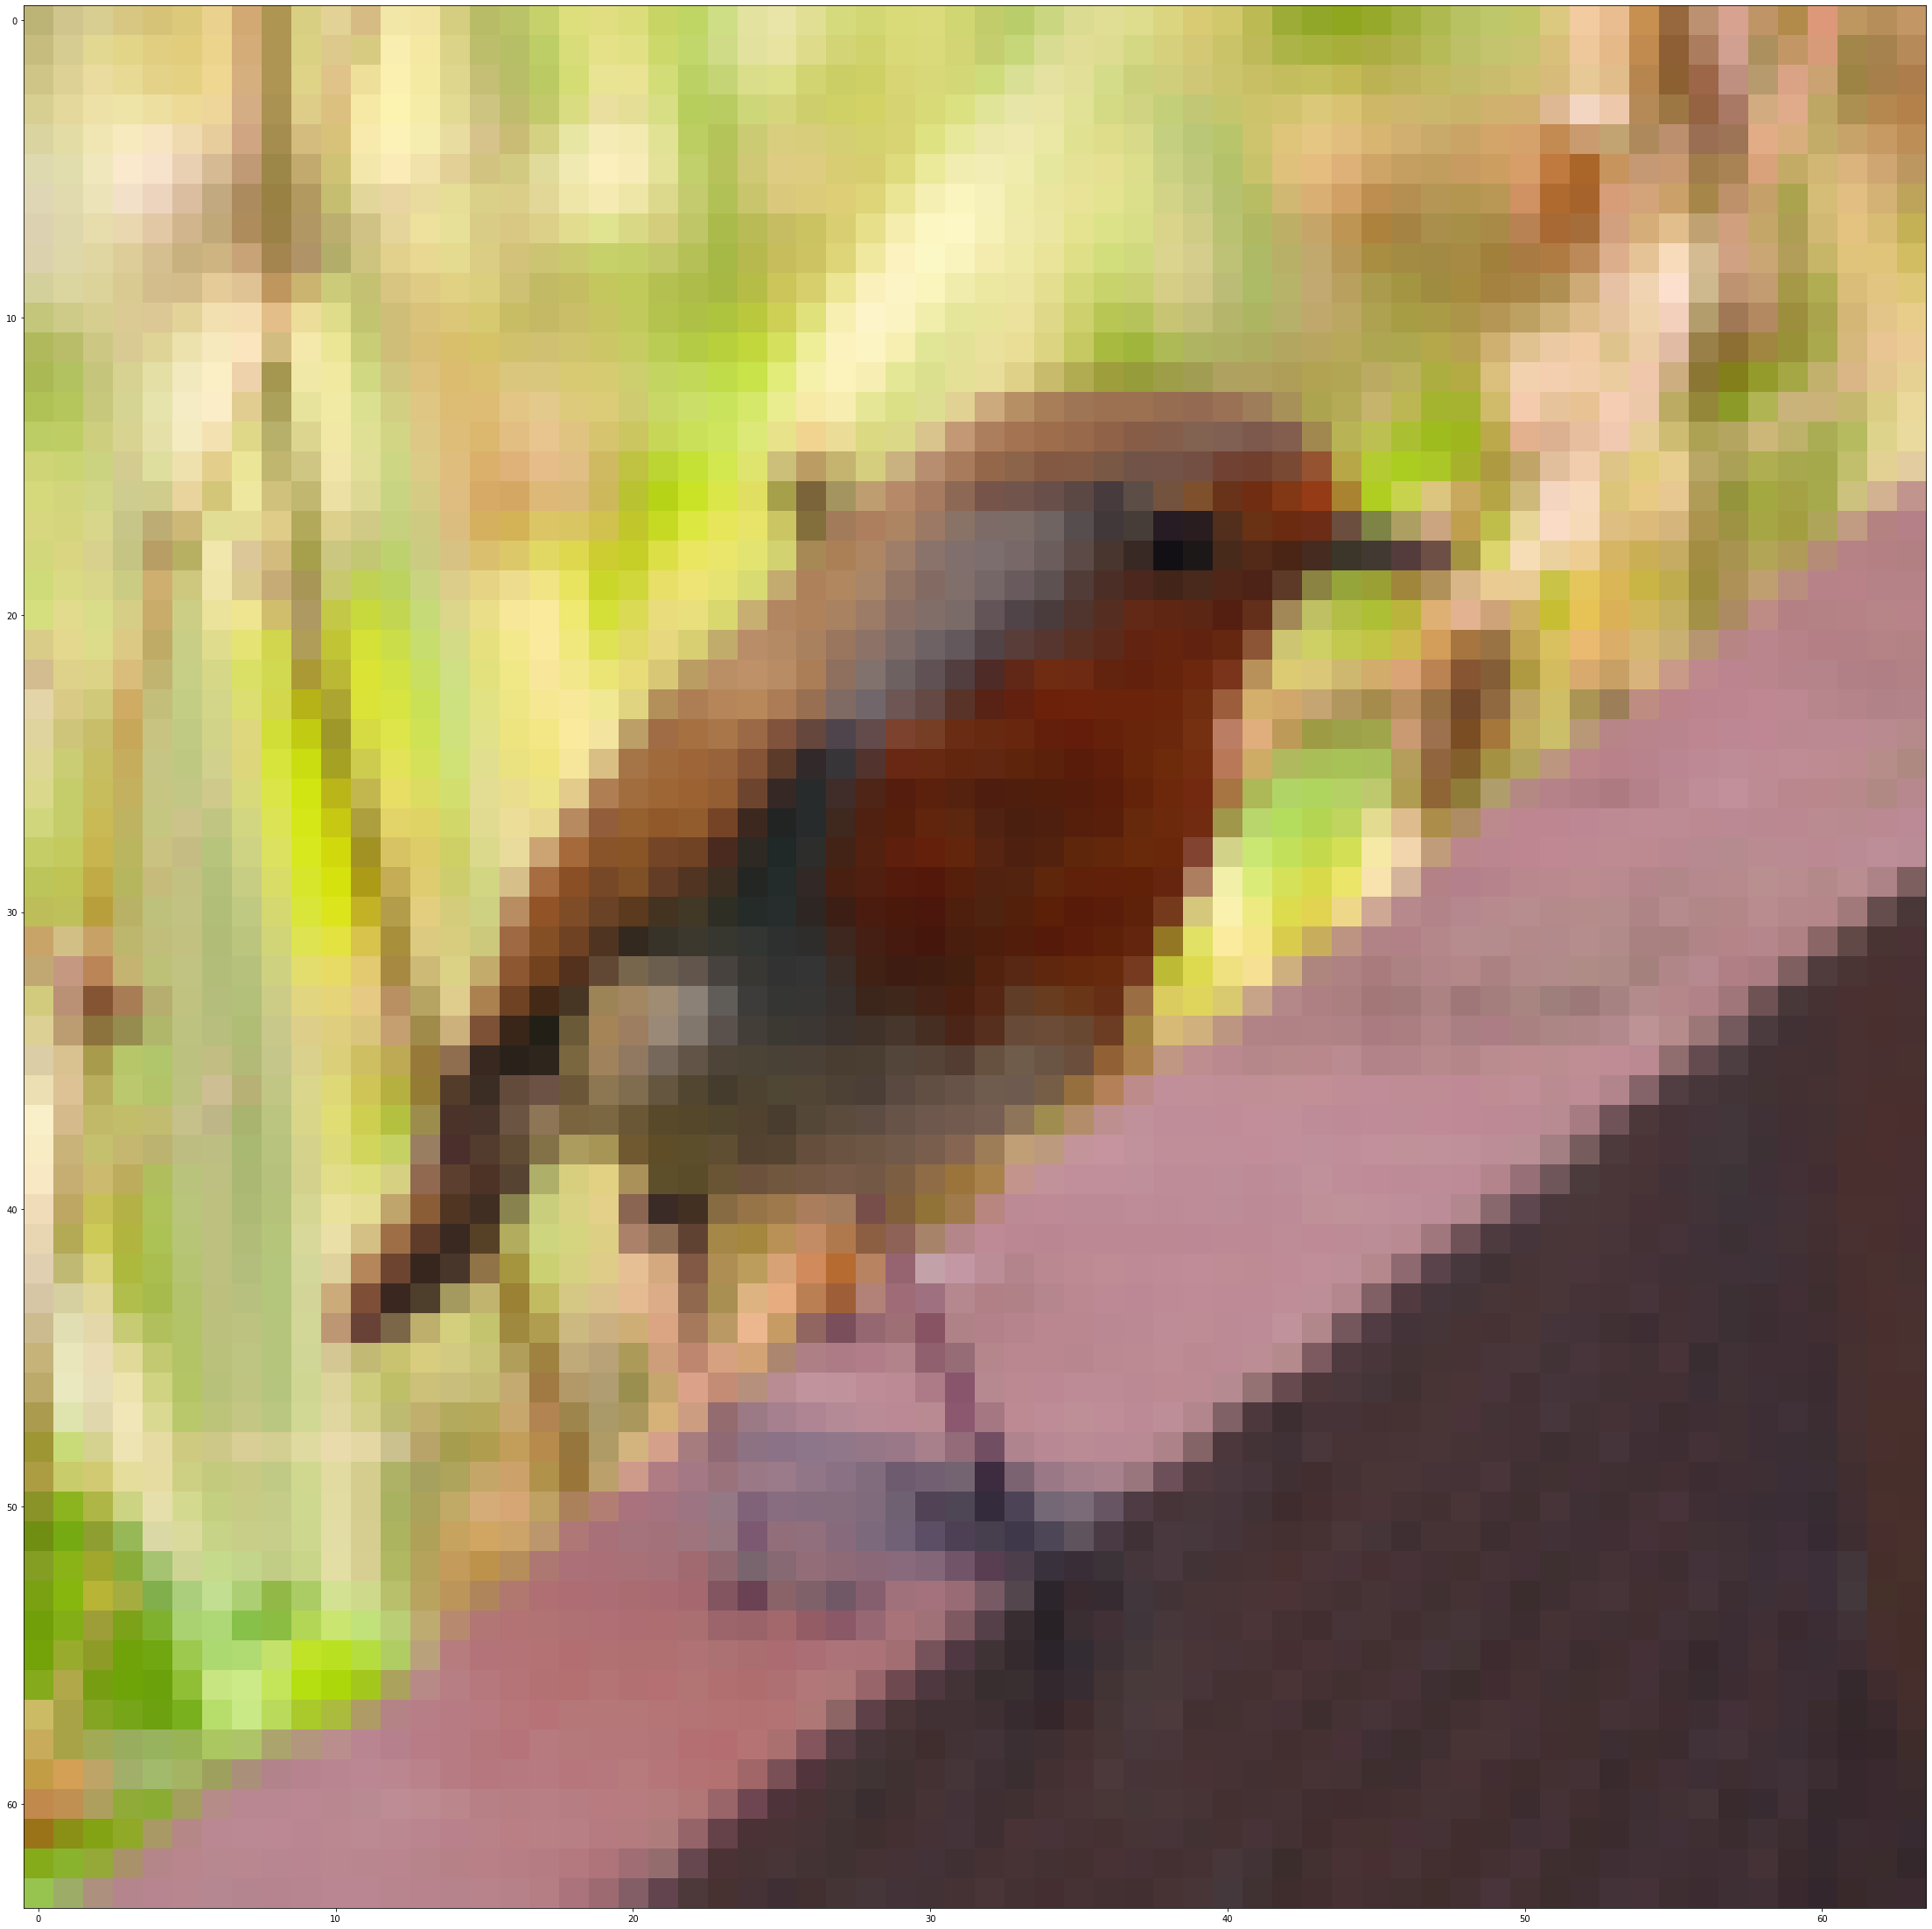

In [105]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [23]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
num_py = train_x_orig.shape[0]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [24]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


learning_rate:0.0075
minibatch_size:64
num_epochs:1500
lambd:0.0
keep_prob:1
beta1:0
beta2:0
epsilon:0
L:4
m:209
n_x:12288
n_y:1
W1(20, 12288)
W1float64
vdW1(20, 12288)
vdW1float64
sdW1(20, 12288)
sdW1float64
b1(20, 1)
b1float64
vdb1(20, 1)
vdb1float64
sdb1(20, 1)
sdb1float64
W2(7, 20)
W2float64
vdW2(7, 20)
vdW2float64
sdW2(7, 20)
sdW2float64
b2(7, 1)
b2float64
vdb2(7, 1)
vdb2float64
sdb2(7, 1)
sdb2float64
W3(5, 7)
W3float64
vdW3(5, 7)
vdW3float64
sdW3(5, 7)
sdW3float64
b3(5, 1)
b3float64
vdb3(5, 1)
vdb3float64
sdb3(5, 1)
sdb3float64
W4(1, 5)
W4float64
vdW4(1, 5)
vdW4float64
sdW4(1, 5)
sdW4float64
b4(1, 1)
b4float64
vdb4(1, 1)
vdb4float64
sdb4(1, 1)
sdb4float64
loss_value: 1.2725612391647412
loss_value: 0.8429276826369874
loss_value: 0.6919374185283362
loss_value: 0.6939271264272263
Cost after epochs 0: 0.875338
loss_value: 0.6925519780288423
loss_value: 0.6920844723632251
loss_value: 0.6907023541377759
loss_value: 0.6906540924283646
loss_value: 0.6909791957328724
loss_value: 0.6909532

loss_value: 0.6460324230138751
loss_value: 0.6422954538068651
loss_value: 0.6507365515642833
loss_value: 0.6716329533193475
loss_value: 0.7110407136779116
loss_value: 0.6499341220935619
loss_value: 0.6636139812256091
loss_value: 0.646064666284605
loss_value: 0.7278022989840147
loss_value: 0.6548338763142834
loss_value: 0.6591139376501821
loss_value: 0.658460855572186
loss_value: 0.6775599122430893
loss_value: 0.6716093712729332
loss_value: 0.6633590680749579
loss_value: 0.6364996194992951
loss_value: 0.67820378716293
loss_value: 0.6491951373341307
loss_value: 0.6494530966117004
loss_value: 0.6674921875235489
loss_value: 0.6950214693218686
loss_value: 0.6622063511698104
loss_value: 0.6629387575555589
loss_value: 0.6357716711476712
loss_value: 0.7122434680977247
loss_value: 0.6537964040029486
loss_value: 0.6849048395341246
loss_value: 0.6171571862175449
loss_value: 0.7297004755633554
loss_value: 0.6666937232914222
loss_value: 0.6444562697273948
loss_value: 0.67158026336054
loss_value: 0.

loss_value: 0.7304422440141485
loss_value: 0.661495733260199
loss_value: 0.6477225553691087
loss_value: 0.6336200452268476
loss_value: 0.6485028208186456
loss_value: 0.6622467182399512
loss_value: 0.6246905497463079
loss_value: 0.6685430774181894
loss_value: 0.5999142034721586
loss_value: 0.6827797268419964
loss_value: 0.632695885242264
loss_value: 0.6393965581635775
loss_value: 0.5995704604491108
loss_value: 0.6479662427476118
loss_value: 0.6681812812384433
loss_value: 0.63319373772575
loss_value: 0.6183387184194213
loss_value: 0.6666042827645084
loss_value: 0.6263850345943593
loss_value: 0.6338337419955142
loss_value: 0.7018554953031838
loss_value: 0.6460008462374032
loss_value: 0.65305661907921
loss_value: 0.64072995997029
loss_value: 0.652025863519345
loss_value: 0.6188722728963596
loss_value: 0.646975243942755
loss_value: 0.6807142537046285
loss_value: 0.6252282602087643
loss_value: 0.6325364063706678
loss_value: 0.6476037929480459
loss_value: 0.673799568051934
loss_value: 0.59655

loss_value: 0.6331368610947412
loss_value: 0.626265506932155
loss_value: 0.6473957940791866
loss_value: 0.7144573394069574
loss_value: 0.657117305769852
loss_value: 0.6088439255450966
loss_value: 0.6662944296517819
loss_value: 0.6175843538063885
loss_value: 0.6501317552070005
loss_value: 0.6340867487278863
loss_value: 0.648672274359373
loss_value: 0.6153791163786738
loss_value: 0.6161733714916906
loss_value: 0.6744648969735044
loss_value: 0.6344424392624274
loss_value: 0.6453164599757334
loss_value: 0.6337107863983377
loss_value: 0.6347746031903052
loss_value: 0.6481458486307068
loss_value: 0.674464990098607
Cost after epochs 200: 0.647774
loss_value: 0.6268205318478784
loss_value: 0.6320731574385126
loss_value: 0.6836024902030523
loss_value: 0.5794545013162233
loss_value: 0.6610442618979
loss_value: 0.6246504074103714
loss_value: 0.655927846674198
loss_value: 0.5792365382800425
loss_value: 0.664391273898107
loss_value: 0.6436360299210118
loss_value: 0.6229667199336172
loss_value: 0.61

loss_value: 0.6450929449838742
loss_value: 0.5968591205290523
loss_value: 0.6456706179509486
loss_value: 0.7075549643903768
loss_value: 0.6099583347190698
loss_value: 0.6136858405560013
loss_value: 0.682411797775931
loss_value: 0.6402224078470957
loss_value: 0.6703593919746086
loss_value: 0.6246390558099881
loss_value: 0.6106678169730471
loss_value: 0.6389670873153993
loss_value: 0.6216722332309366
loss_value: 0.6492329706104536
loss_value: 0.6542672361910862
loss_value: 0.5611015361050921
loss_value: 0.6216613113866738
loss_value: 0.6701310474533511
loss_value: 0.5853365219721562
loss_value: 0.7404166430229058
loss_value: 0.6075905746758439
loss_value: 0.651678779463124
loss_value: 0.660761323330149
loss_value: 0.5787387628775186
loss_value: 0.6468413467488499
loss_value: 0.5877339761859273
loss_value: 0.658527722140177
loss_value: 0.6769106666610218
loss_value: 0.6593251830824556
loss_value: 0.6815844420136037
loss_value: 0.5819646764571202
loss_value: 0.5712944214855024
loss_value: 

loss_value: 0.6439879937606764
loss_value: 0.6246287749380651
loss_value: 0.6319660571736132
loss_value: 0.5537107808599788
loss_value: 0.6550147966935439
loss_value: 0.6193447383337505
loss_value: 0.6275072989664887
loss_value: 0.5465021906008841
loss_value: 0.6132350830537091
loss_value: 0.6178101206627566
loss_value: 0.6536910436244068
loss_value: 0.634929724696305
loss_value: 0.6243895906583508
loss_value: 0.6612939370169997
loss_value: 0.5982333274665161
loss_value: 0.6104791580826584
loss_value: 0.6152317442362569
loss_value: 0.6403763675150848
loss_value: 0.5995772978569376
loss_value: 0.7090073696814482
loss_value: 0.6413019132909443
loss_value: 0.6889074625545104
loss_value: 0.6044730952507914
loss_value: 0.40979526343526324
loss_value: 0.6997085253475317
loss_value: 0.6341812574197878
loss_value: 0.5420463152639842
loss_value: 0.6569483696924726
loss_value: 0.5818300630096539
loss_value: 0.6865011218130264
loss_value: 0.6457901499732104
loss_value: 0.5160717543294338
loss_val

loss_value: 0.6124364675194427
loss_value: 0.6568412147083511
loss_value: 0.5664328476768983
loss_value: 0.593708370863709
loss_value: 0.6413124487993895
loss_value: 0.5903054189682504
loss_value: 0.5880977463551582
loss_value: 0.6461803413023128
loss_value: 0.6169798088155338
loss_value: 0.6041055350185561
loss_value: 0.6093841763944335
loss_value: 0.6197452647277552
loss_value: 0.6288269952892536
loss_value: 0.5934646676798494
loss_value: 0.5909830413986373
loss_value: 0.6586252861307317
Cost after epochs 400: 0.617975
loss_value: 0.6205861122009934
loss_value: 0.5586378114385575
loss_value: 0.633961711865135
loss_value: 0.6558496347349085
loss_value: 0.559108913262699
loss_value: 0.6239404729770959
loss_value: 0.6102077193226523
loss_value: 0.7236925033355265
loss_value: 0.6552148665188249
loss_value: 0.6281743627389529
loss_value: 0.5352917581108303
loss_value: 0.6420082864573756
loss_value: 0.6111960745041525
loss_value: 0.5955397978698099
loss_value: 0.5984534755722638
loss_value

loss_value: 0.5187151518567334
loss_value: 0.5186928348281201
loss_value: 0.5136472501752438
loss_value: 0.5949711114119911
loss_value: 0.6317783368130934
loss_value: 0.5247112833863298
loss_value: 0.4839508608460587
loss_value: 0.6391531603493746
loss_value: 0.6905349788545537
loss_value: 0.5182515697828881
loss_value: 0.4809334744650088
loss_value: 0.48850874879875333
loss_value: 0.4979425453236083
loss_value: 0.4996919510472635
loss_value: 0.534823940441379
loss_value: 0.48682730126141166
loss_value: 0.4771939830378866
loss_value: 0.5347922202813963
loss_value: 0.5683603124563756
loss_value: 0.5663915420119928
loss_value: 0.6595905874267142
loss_value: 0.4644645417475467
loss_value: 0.5178883462668029
loss_value: 0.5389208820966322
loss_value: 0.5274768266172001
loss_value: 0.4899030975152402
loss_value: 0.5284873152958405
loss_value: 0.4410826779809253
loss_value: 0.6276145113919205
loss_value: 0.5417912456249051
loss_value: 0.5060710784639778
loss_value: 0.583654749751071
loss_val

loss_value: 0.37803722991290434
loss_value: 0.4153556271948532
loss_value: 0.34206966896731666
loss_value: 0.43193243591779984
loss_value: 0.5192021839658565
loss_value: 0.4144019138399068
loss_value: 0.32914076241162354
loss_value: 0.3576886958959303
loss_value: 0.42753711244674364
loss_value: 0.41461707573975215
loss_value: 0.2799292877484363
loss_value: 0.41555186119521237
loss_value: 0.40236081888340053
loss_value: 0.4702189688689845
loss_value: 0.4093026184895875
loss_value: 0.3933687451421193
loss_value: 0.3324364278452723
loss_value: 0.38436577038783304
loss_value: 0.3681445307781589
loss_value: 0.3609519273594962
loss_value: 0.4596263592663141
loss_value: 0.4553877060293632
loss_value: 0.5636737543963724
loss_value: 0.4311040464513557
loss_value: 0.3780831016589251
loss_value: 0.3711171183717601
loss_value: 0.31847515469791116
loss_value: 0.36658670475740207
loss_value: 0.35146292737176926
loss_value: 0.36600156801231165
loss_value: 0.44240693317971286
loss_value: 0.37476318424

loss_value: 0.2666131564521772
loss_value: 0.3093223228806132
loss_value: 0.40886729775489566
loss_value: 0.4646848147885385
loss_value: 0.3083401618520737
loss_value: 0.39866385659629855
loss_value: 0.3084489990841607
loss_value: 0.4642115894920672
loss_value: 0.4790537259403127
loss_value: 0.645638535019619
loss_value: 0.3332833509784295
loss_value: 0.32382566541208957
loss_value: 0.2811789919584698
loss_value: 0.24953339566396748
loss_value: 0.34476658188685266
loss_value: 0.3622010717155715
loss_value: 0.3876516380275493
loss_value: 0.3164924107518026
loss_value: 0.42861568227873215
loss_value: 0.3138084245362382
loss_value: 0.326782359578463
loss_value: 0.4461160878051369
loss_value: 0.2416925097831042
Cost after epochs 600: 0.332100
loss_value: 0.2680237718435503
loss_value: 0.24328014097036457
loss_value: 0.32200141324568265
loss_value: 0.24835837216811568
loss_value: 0.2527283346153129
loss_value: 0.2725131624442382
loss_value: 0.2971709554883868
loss_value: 0.32585138489675186

loss_value: 0.20645710787001453
loss_value: 0.15492210652368668
loss_value: 0.21373644607435965
loss_value: 0.17887189504172057
loss_value: 0.17804375023647157
loss_value: 0.19699811312558504
loss_value: 0.18983806718198687
loss_value: 0.18495932607917678
loss_value: 0.24795271351180462
loss_value: 0.748751604561193
loss_value: 0.7415735686898877
loss_value: 0.6295689110644745
loss_value: 0.5869129686939802
loss_value: 0.3798870152178459
loss_value: 0.460818715905686
loss_value: 0.3219510565776522
loss_value: 0.408910645798945
loss_value: 0.45347084416120836
loss_value: 0.4089542970868501
loss_value: 0.3806892207923946
loss_value: 0.24777908871238807
loss_value: 0.24218591568016443
loss_value: 0.22439228763749963
loss_value: 0.21190178715702462
loss_value: 0.21120127808303546
loss_value: 0.16847268680836885
loss_value: 0.2809759126509644
loss_value: 0.29130252837288906
loss_value: 0.16267523550049112
loss_value: 0.18161659617984507
loss_value: 0.23170438062209714
loss_value: 0.29324247

loss_value: 0.11774264307392066
loss_value: 0.14520586217293216
loss_value: 0.11148490619181002
loss_value: 0.1522027142675632
loss_value: 0.18907273170059558
loss_value: 0.2016942648646937
loss_value: 0.5646538545569609
loss_value: 0.2034609138717408
loss_value: 0.18655766221911368
loss_value: 0.10222384718072355
loss_value: 0.06359029072295973
loss_value: 0.13710239193160628
loss_value: 0.09924584800066155
loss_value: 0.1558435083155798
loss_value: 0.18082271215268356
loss_value: 0.2063326325940439
loss_value: 0.11128876408432062
loss_value: 0.12075866203062943
loss_value: 0.0955221140124969
loss_value: 0.11146699667782912
loss_value: 0.1383878502581013
loss_value: 0.16532642765293448
loss_value: 0.11959256755933587
loss_value: 0.10331068127240141
loss_value: 0.16981148587897738
loss_value: 0.16249550565244827
loss_value: 0.11938691323194191
loss_value: 0.1064910199989942
loss_value: 0.17562640682511782
loss_value: 0.09216304335274746
loss_value: 0.17840828466279077
loss_value: 0.320

loss_value: 0.11143323014336995
loss_value: 0.11339217741424916
loss_value: 0.08478337886351568
loss_value: 0.11130781713974552
loss_value: 0.07397910125574311
loss_value: 0.10740318830362851
loss_value: 0.08119506384110486
loss_value: 0.1073854072960962
loss_value: 0.07142990023161289
loss_value: 0.10901407849903977
loss_value: 0.09775388487116872
loss_value: 0.15747485109527024
loss_value: 0.07495219454180044
loss_value: 0.14802307486966237
loss_value: 0.07138784146316303
loss_value: 0.10996110389546793
loss_value: 0.07498566736188586
loss_value: 0.11054885891635427
loss_value: 0.0746831785708862
loss_value: 0.10643763937065986
loss_value: 0.08150118788289318
loss_value: 0.10456051022845485
loss_value: 0.06383679034712783
loss_value: 0.10186765020359469
loss_value: 0.10484136627118447
loss_value: 0.08061619878718823
loss_value: 0.0870398152598843
loss_value: 0.07942393231119982
loss_value: 0.10726010485375922
loss_value: 0.09938201426187443
loss_value: 0.12748075527797031
loss_value:

loss_value: 0.05029890542284063
loss_value: 0.051643700010643945
loss_value: 0.09811617244220608
loss_value: 0.18908412374924174
loss_value: 0.08601198772836376
loss_value: 0.09839694723156317
loss_value: 0.05240419479656436
loss_value: 0.04607195808309846
loss_value: 0.08945653817376967
loss_value: 0.05359260064094497
loss_value: 0.09138689605573831
loss_value: 0.06190644801335809
loss_value: 0.09601790742320054
loss_value: 0.05536735931929483
loss_value: 0.08642670640838132
loss_value: 0.04635042110522918
loss_value: 0.08649789489674536
loss_value: 0.0949198985815685
loss_value: 0.04798366874579216
loss_value: 0.06568413431678718
loss_value: 0.04788584708766899
loss_value: 0.05486809832302995
loss_value: 0.09295957458114297
loss_value: 0.18840434305230047
loss_value: 0.09236197993738715
loss_value: 0.09678749025338408
loss_value: 0.04491799209693194
loss_value: 0.043454750386682346
loss_value: 0.08892363935522739
loss_value: 0.053422915421592373
loss_value: 0.08999025756766776
loss_v

loss_value: 0.03735348492383349
loss_value: 0.07352361631222656
loss_value: 0.047445699781166285
loss_value: 0.20734553124742372
loss_value: 0.08259729766169124
loss_value: 0.07306662872733889
loss_value: 0.04401606663823045
loss_value: 0.04536861472270092
loss_value: 0.037502417948167804
loss_value: 0.0872305807821316
loss_value: 0.07642104483872805
loss_value: 0.04670409289499088
loss_value: 0.12138746304890183
loss_value: 0.04256320619409082
loss_value: 0.038574144600302826
loss_value: 0.03439413478172938
loss_value: 0.07414857050178784
loss_value: 0.04604346586638061
loss_value: 0.08094877707874748
loss_value: 0.04204041639195834
loss_value: 0.04060700180857239
loss_value: 0.0741792468898293
loss_value: 0.040556508265364735
loss_value: 0.20979089093065256
loss_value: 0.07789565352217445
loss_value: 0.036270973901135393
loss_value: 0.0422429411483856
loss_value: 0.2042333503302349
loss_value: 0.08840454261593475
loss_value: 0.03545720166560584
loss_value: 0.04019551313238538
loss_va

loss_value: 0.03475740117909708
loss_value: 0.032484972561050623
loss_value: 0.06994954437130568
loss_value: 0.03241658068376643
loss_value: 0.06320726610393823
loss_value: 0.03204199556568427
loss_value: 0.0397034015964287
loss_value: 0.03857410942119197
loss_value: 0.032479192708454965
loss_value: 0.03319759538128936
loss_value: 0.06995422764130693
loss_value: 0.03280340263001789
loss_value: 0.03293113642117933
loss_value: 0.029912244986591275
loss_value: 0.03554469327294912
loss_value: 0.1705427766659645
loss_value: 0.036800696654570295
loss_value: 0.06462993466119688
loss_value: 0.031041515530383118
loss_value: 0.04134193085970286
loss_value: 0.03560722920828748
loss_value: 0.069247441260438
loss_value: 0.03169096663134112
loss_value: 0.023081231090579177
loss_value: 0.03288794968076715
loss_value: 0.06586741734568616
loss_value: 0.03613257455516445
loss_value: 0.029407934360521873
loss_value: 0.06927880501682779
loss_value: 0.029453883863184725
loss_value: 0.03249538787198604
loss

loss_value: 0.02508937775626415
loss_value: 0.028390989441605913
loss_value: 0.029392365583986644
Cost after epochs 1050: 0.033329
loss_value: 0.028631432860554133
loss_value: 0.048990435536744426
loss_value: 0.026962663679192866
loss_value: 0.0245942076178092
loss_value: 0.027948826805653304
loss_value: 0.047841617022243876
loss_value: 0.027573769756454928
loss_value: 0.027526036638573326
loss_value: 0.027410330248628455
loss_value: 0.0278146432785668
loss_value: 0.050234323779298276
loss_value: 0.02391272152217296
loss_value: 0.02876117691665534
loss_value: 0.02748837069214228
loss_value: 0.04749850624279314
loss_value: 0.023205854490334247
loss_value: 0.028015218683693697
loss_value: 0.02720841287707427
loss_value: 0.024739152085711293
loss_value: 0.11442734579137552
loss_value: 0.026130236436140417
loss_value: 0.025171231752064142
loss_value: 0.029094913254763172
loss_value: 0.1073447167245571
loss_value: 0.030323179057501638
loss_value: 0.04346962226533892
loss_value: 0.0289669030

loss_value: 0.0211295567066524
loss_value: 0.022213591711045994
loss_value: 0.0219219294847761
loss_value: 0.025558203585020672
loss_value: 0.022157422563779165
loss_value: 0.02394921367067024
loss_value: 0.020075635118318717
loss_value: 0.0206616680315902
loss_value: 0.02244558134350491
loss_value: 0.02200327322010047
loss_value: 0.020998802041579917
loss_value: 0.025423145065449432
loss_value: 0.021218041248413214
loss_value: 0.019749001349456778
loss_value: 0.02513429186343004
loss_value: 0.019432595040718342
loss_value: 0.02612983717673424
loss_value: 0.021856058907901744
loss_value: 0.01817711277499484
loss_value: 0.017555455764238365
loss_value: 0.02185783472820547
loss_value: 0.023100274123378547
loss_value: 0.019677772706262687
loss_value: 0.02334705566603111
loss_value: 0.020235518620367304
loss_value: 0.020794326422197973
loss_value: 0.02406029364621183
loss_value: 0.019431898406063033
loss_value: 0.01796000388376471
loss_value: 0.02202052314629624
loss_value: 0.0254290052258

loss_value: 0.017825144118411393
loss_value: 0.017617262301550245
loss_value: 0.017733662688762128
loss_value: 0.016545600474149748
loss_value: 0.01916823974896524
loss_value: 0.01373639935585264
loss_value: 0.016589518723759217
loss_value: 0.01696590767211048
loss_value: 0.019040750833002457
loss_value: 0.01596299573864298
loss_value: 0.01750850376656697
loss_value: 0.017693418303812165
loss_value: 0.016018261773636716
loss_value: 0.019937809965009327
loss_value: 0.018873573850010386
loss_value: 0.017976241261152066
loss_value: 0.016631004877742387
loss_value: 0.01121329933896583
loss_value: 0.01747514303573356
loss_value: 0.016169365560486773
loss_value: 0.018732168800647604
loss_value: 0.014695302078400236
loss_value: 0.018367103658708882
loss_value: 0.01599066728947937
loss_value: 0.017267765815430575
loss_value: 0.016954138351993494
loss_value: 0.017345179482883215
loss_value: 0.016973795235616776
loss_value: 0.01721894891087924
loss_value: 0.017500148759010438
loss_value: 0.01715

loss_value: 0.015906568258432462
loss_value: 0.013565437679279785
loss_value: 0.014153709071888666
loss_value: 0.015486220509818833
loss_value: 0.014407406253642452
loss_value: 0.014502392985778866
loss_value: 0.015237626610863432
loss_value: 0.012876841107013837
loss_value: 0.014565185093176327
loss_value: 0.01304706451290552
loss_value: 0.015720455959333246
loss_value: 0.015157271871150105
loss_value: 0.014534849926153469
loss_value: 0.016451856438152758
loss_value: 0.01263080753034489
loss_value: 0.015039183310645814
loss_value: 0.01506200014006137
loss_value: 0.013104038859175458
loss_value: 0.015108126131859868
loss_value: 0.014845425830204968
loss_value: 0.015968470626587794
loss_value: 0.013153197837356113
loss_value: 0.015143195243454293
loss_value: 0.010552017001521662
loss_value: 0.014140933233676113
loss_value: 0.015166321018158301
loss_value: 0.013739593830240895
loss_value: 0.014710377272818187
loss_value: 0.014695539139579283
loss_value: 0.014019635406133223
loss_value: 0

loss_value: 0.013899907844645197
loss_value: 0.011257970940242208
loss_value: 0.014659290559984134
loss_value: 0.012816259452932386
loss_value: 0.011668881916864583
loss_value: 0.013217445367731909
loss_value: 0.012404157073221659
loss_value: 0.01139931759677238
loss_value: 0.01323083026278189
loss_value: 0.013008302972651695
loss_value: 0.011492388979658139
loss_value: 0.012011787610355821
loss_value: 0.012497571430363013
loss_value: 0.012814285024869096
loss_value: 0.012806506414962837
loss_value: 0.01280467204621634
loss_value: 0.012056731590958037
loss_value: 0.012661790264709373
loss_value: 0.011589322029681902
loss_value: 0.011586391707908344
loss_value: 0.012135107878086788
loss_value: 0.014118180712121946
loss_value: 0.009707275117629475
loss_value: 0.012350956716530484
loss_value: 0.011097987499260558
loss_value: 0.013231183279583805
loss_value: 0.013792251076121465
loss_value: 0.012656430366160702
loss_value: 0.011769427135414222
loss_value: 0.011878118470130077
loss_value: 0

loss_value: 0.01197207484600853
loss_value: 0.008715948030177369
loss_value: 0.01157152826405782
loss_value: 0.01075630405370575
loss_value: 0.010572833510179755
loss_value: 0.011554474278703182
loss_value: 0.011322843006981076
loss_value: 0.011704975870719905
loss_value: 0.011028905763040504
loss_value: 0.009813696738159476
loss_value: 0.011438473146411936
loss_value: 0.010462219102968904
loss_value: 0.012242707217498608
loss_value: 0.009910558248418164
loss_value: 0.01108864805069585
loss_value: 0.010607515252756205
loss_value: 0.010598502931827562
loss_value: 0.012554648932188228
loss_value: 0.006150887972866073
loss_value: 0.01189997172302669
loss_value: 0.010517554172774779
loss_value: 0.010205585185325532
loss_value: 0.010351343786669083
loss_value: 0.010448424144713355
loss_value: 0.01039844753637753
loss_value: 0.012420786547791794
loss_value: 0.007496030131121455
loss_value: 0.01046172869193529
loss_value: 0.010776228577408446
loss_value: 0.010768299002807905
loss_value: 0.012

loss_value: 0.008062369786400623
loss_value: 0.010211982312369574
loss_value: 0.010242184960279864
loss_value: 0.011072207299161519
loss_value: 0.00975962388312681
loss_value: 0.008665420378369204
loss_value: 0.009977320390688948
loss_value: 0.01161288243293441
loss_value: 0.00864437984716903
loss_value: 0.0101415181533008
loss_value: 0.010259329506193354
loss_value: 0.008752427108265693
loss_value: 0.009183505478834468
loss_value: 0.009846455138448645
loss_value: 0.0094603288604067
loss_value: 0.010627935971222094
loss_value: 0.008516728231180309
loss_value: 0.010019554744373802
loss_value: 0.010051789352842146
loss_value: 0.009895754738556277
loss_value: 0.010599947336010843
loss_value: 0.00831121255071865
loss_value: 0.009623926959003739
loss_value: 0.009886977021767537
loss_value: 0.010813057121380396
loss_value: 0.009230784398560732
loss_value: 0.00881854236018173
loss_value: 0.00839992621953062
loss_value: 0.009908277638310387
loss_value: 0.009462192727273886
loss_value: 0.009559

loss_value: 0.009505839641664831
loss_value: 0.008788338308860463
loss_value: 0.0070948740647914215
loss_value: 0.009241094710616795
loss_value: 0.011023757487252536
loss_value: 0.008357947953023824
loss_value: 0.008449885991490304
loss_value: 0.00902124401195285
loss_value: 0.009669342295367258
loss_value: 0.00809571901702471
loss_value: 0.007942043908534424
loss_value: 0.00961595593012389
loss_value: 0.00900289293167843
loss_value: 0.00832738213874105
loss_value: 0.00865626148085433
loss_value: 0.008999462316635898
loss_value: 0.007139926912806731
loss_value: 0.00832789355692878
loss_value: 0.008279861137285625
loss_value: 0.009167299131037133
loss_value: 0.0077779219804317325
loss_value: 0.007803615721684693
loss_value: 0.009570977578997535
loss_value: 0.0087307180430841
loss_value: 0.0063256574355589675
loss_value: 0.008855199073928344
loss_value: 0.00883459878793943
loss_value: 0.007846412886575671
loss_value: 0.008225749912424786


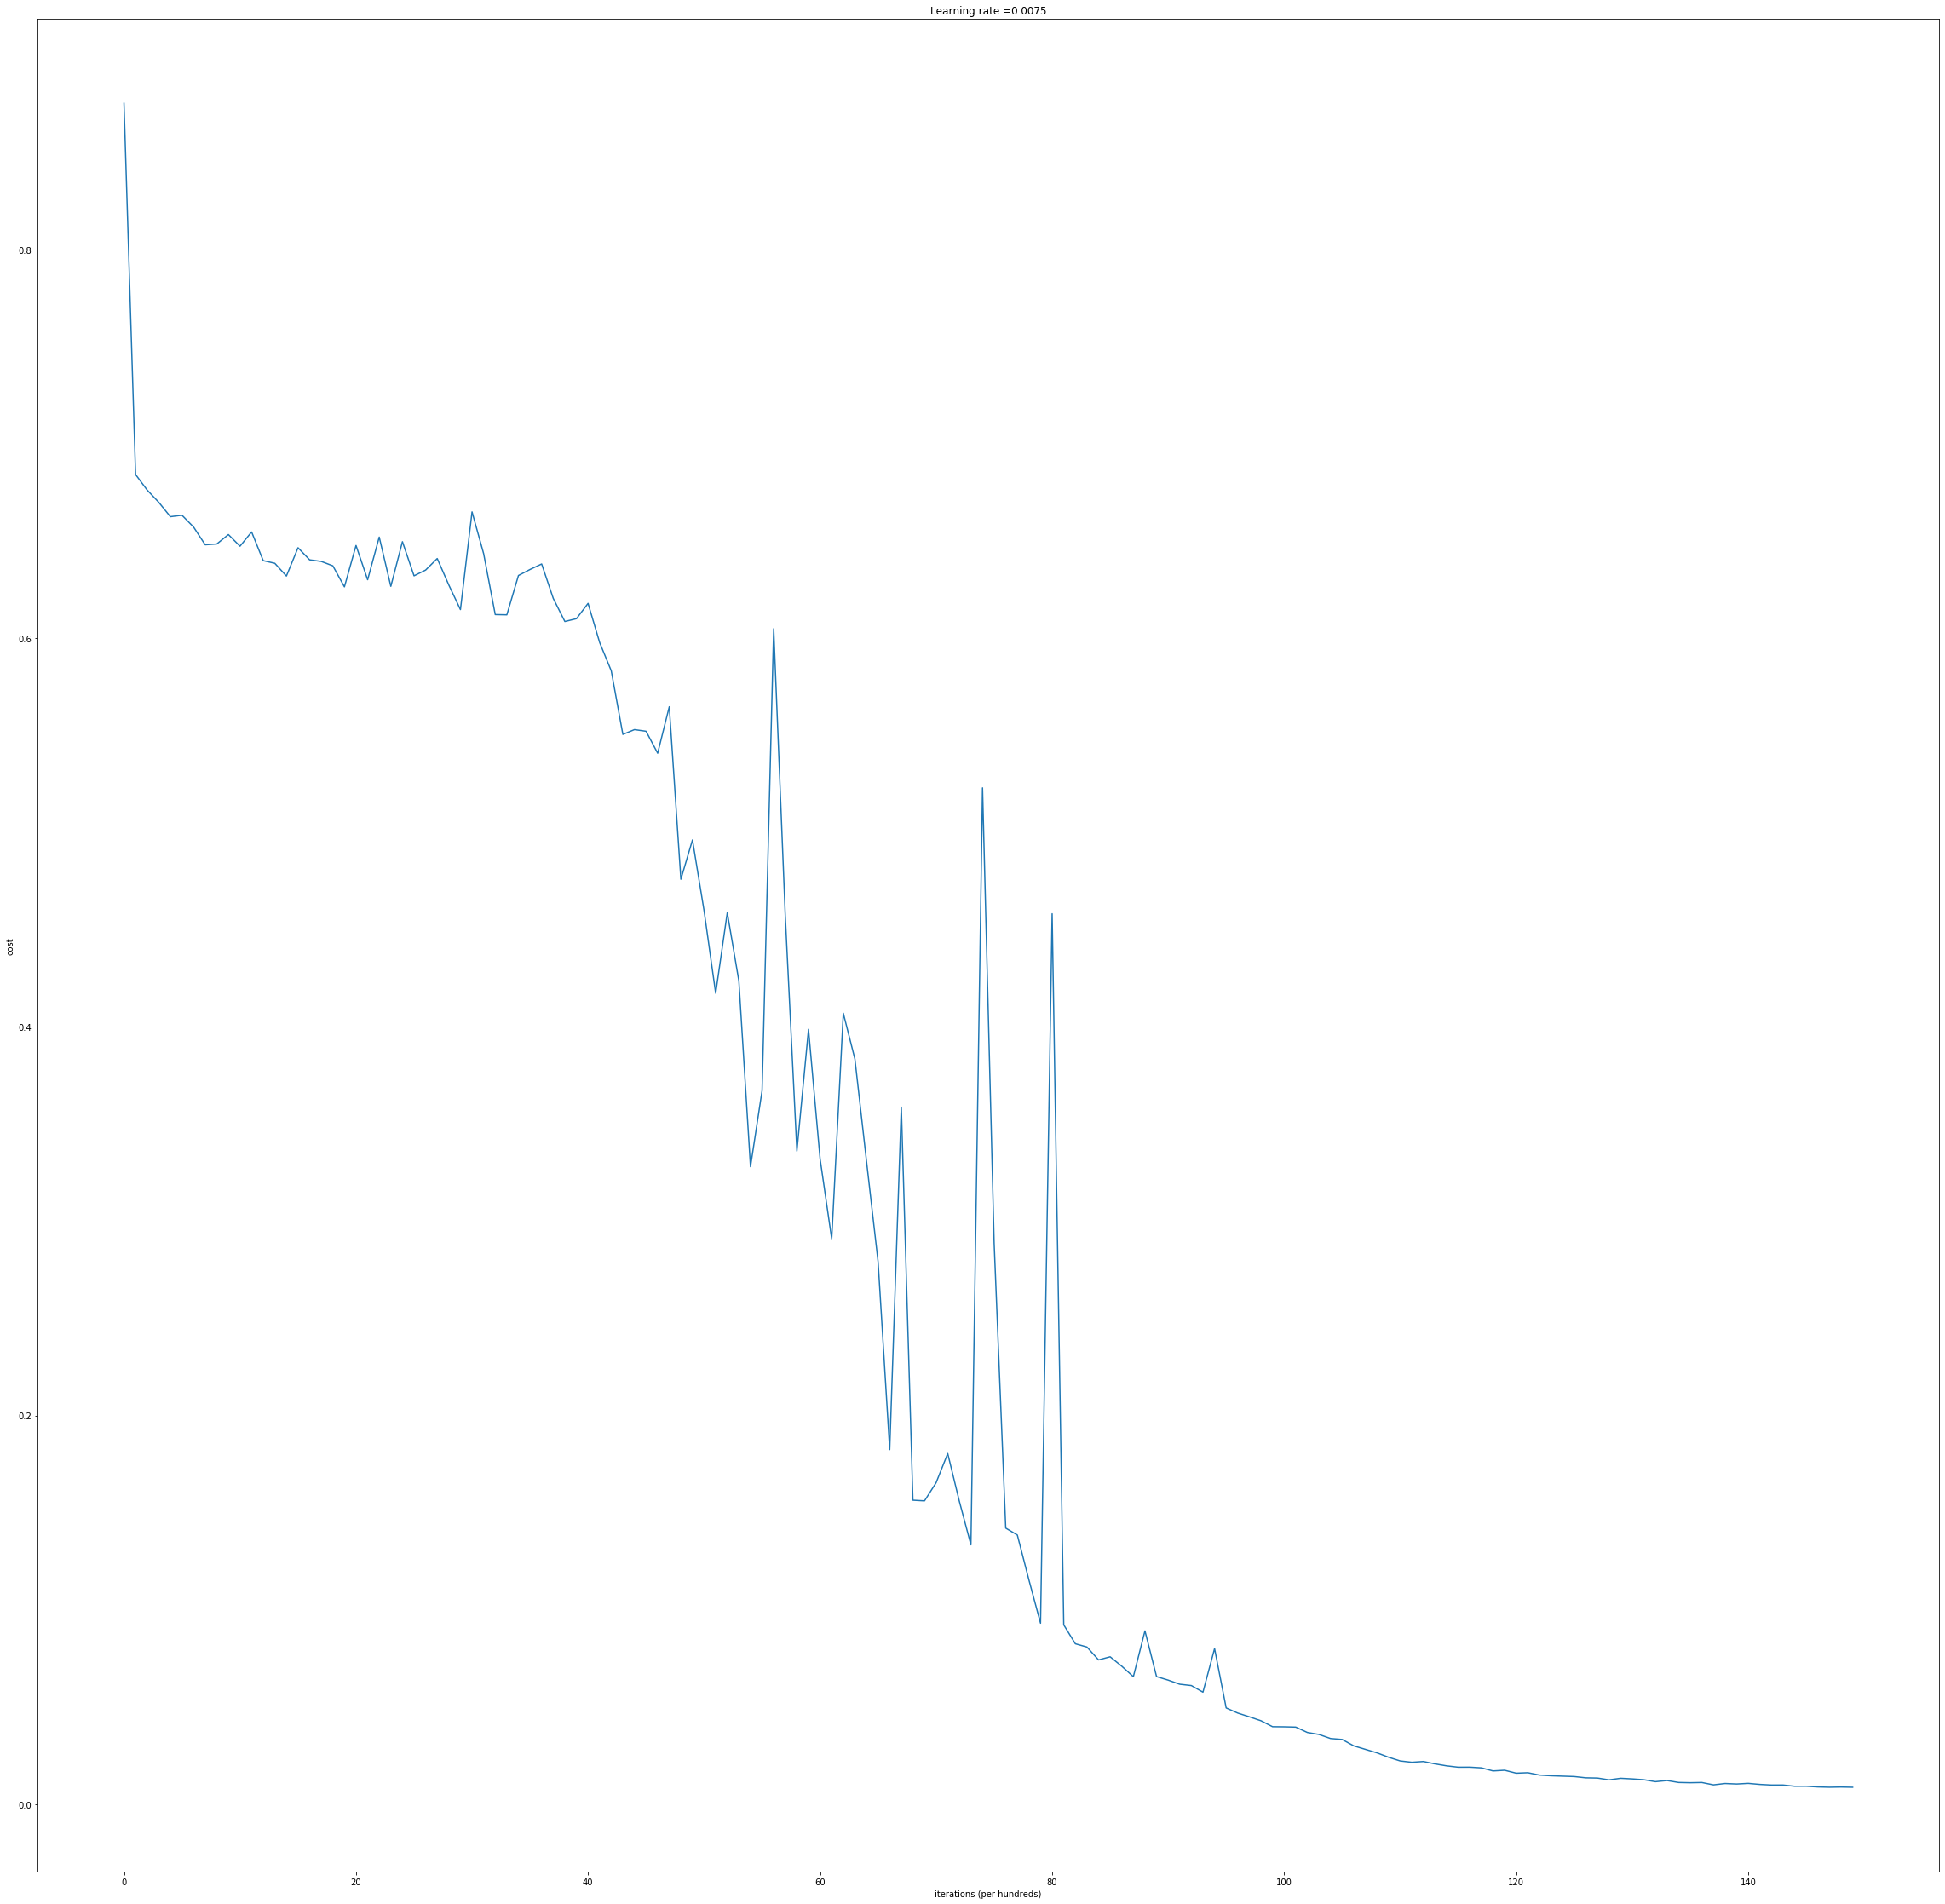

In [93]:
np.set_printoptions(precision=15)
parameters = L_layer_model(train_x, train_y, layers_dims, learning_rate = 0.0075, print_cost = True, lambd = 0.,  keep_prob = 1, num_epochs = 1500, ADAM = False, minibatch_size = 64)

learning_rate:0.0075
minibatch_size:64
num_epochs:1500
lambd:0.0
keep_prob:1
beta1:0
beta2:0
epsilon:0
L:4
m:209
n_x:12288
n_y:1
W1(20, 12288)
W1float64
vdW1(20, 12288)
vdW1float64
sdW1(20, 12288)
sdW1float64
b1(20, 1)
b1float64
vdb1(20, 1)
vdb1float64
sdb1(20, 1)
sdb1float64
W2(7, 20)
W2float64
vdW2(7, 20)
vdW2float64
sdW2(7, 20)
sdW2float64
b2(7, 1)
b2float64
vdb2(7, 1)
vdb2float64
sdb2(7, 1)
sdb2float64
W3(5, 7)
W3float64
vdW3(5, 7)
vdW3float64
sdW3(5, 7)
sdW3float64
b3(5, 1)
b3float64
vdb3(5, 1)
vdb3float64
sdb3(5, 1)
sdb3float64
W4(1, 5)
W4float64
vdW4(1, 5)
vdW4float64
sdW4(1, 5)
sdW4float64
b4(1, 1)
b4float64
vdb4(1, 1)
vdb4float64
sdb4(1, 1)
sdb4float64
loss_value: 1.2725612391647412
loss_value: 0.8429276826369874
loss_value: 0.6919374185283362
loss_value: 0.6939271264272263
Cost after epochs 0: 0.875338
loss_value: 0.6925519780288423
loss_value: 0.6920844723632251
loss_value: 0.6907023541377759
loss_value: 0.6906540924283646
loss_value: 0.6909791957328724
loss_value: 0.6909532

loss_value: 0.6460324230138751
loss_value: 0.6422954538068651
loss_value: 0.6507365515642833
loss_value: 0.6716329533193475
loss_value: 0.7110407136779116
loss_value: 0.6499341220935619
loss_value: 0.6636139812256091
loss_value: 0.646064666284605
loss_value: 0.7278022989840147
loss_value: 0.6548338763142834
loss_value: 0.6591139376501821
loss_value: 0.658460855572186
loss_value: 0.6775599122430893
loss_value: 0.6716093712729332
loss_value: 0.6633590680749579
loss_value: 0.6364996194992951
loss_value: 0.67820378716293
loss_value: 0.6491951373341307
loss_value: 0.6494530966117004
loss_value: 0.6674921875235489
loss_value: 0.6950214693218686
loss_value: 0.6622063511698104
loss_value: 0.6629387575555589
loss_value: 0.6357716711476712
loss_value: 0.7122434680977247
loss_value: 0.6537964040029486
loss_value: 0.6849048395341246
loss_value: 0.6171571862175449
loss_value: 0.7297004755633554
loss_value: 0.6666937232914222
loss_value: 0.6444562697273948
loss_value: 0.67158026336054
loss_value: 0.

loss_value: 0.7304422440141485
loss_value: 0.661495733260199
loss_value: 0.6477225553691087
loss_value: 0.6336200452268476
loss_value: 0.6485028208186456
loss_value: 0.6622467182399512
loss_value: 0.6246905497463079
loss_value: 0.6685430774181894
loss_value: 0.5999142034721586
loss_value: 0.6827797268419964
loss_value: 0.632695885242264
loss_value: 0.6393965581635775
loss_value: 0.5995704604491108
loss_value: 0.6479662427476118
loss_value: 0.6681812812384433
loss_value: 0.63319373772575
loss_value: 0.6183387184194213
loss_value: 0.6666042827645084
loss_value: 0.6263850345943593
loss_value: 0.6338337419955142
loss_value: 0.7018554953031838
loss_value: 0.6460008462374032
loss_value: 0.65305661907921
loss_value: 0.64072995997029
loss_value: 0.652025863519345
loss_value: 0.6188722728963596
loss_value: 0.646975243942755
loss_value: 0.6807142537046285
loss_value: 0.6252282602087643
loss_value: 0.6325364063706678
loss_value: 0.6476037929480459
loss_value: 0.673799568051934
loss_value: 0.59655

loss_value: 0.6331368610947412
loss_value: 0.626265506932155
loss_value: 0.6473957940791866
loss_value: 0.7144573394069574
loss_value: 0.657117305769852
loss_value: 0.6088439255450966
loss_value: 0.6662944296517819
loss_value: 0.6175843538063885
loss_value: 0.6501317552070005
loss_value: 0.6340867487278863
loss_value: 0.648672274359373
loss_value: 0.6153791163786738
loss_value: 0.6161733714916906
loss_value: 0.6744648969735044
loss_value: 0.6344424392624274
loss_value: 0.6453164599757334
loss_value: 0.6337107863983377
loss_value: 0.6347746031903052
loss_value: 0.6481458486307068
loss_value: 0.674464990098607
Cost after epochs 200: 0.647774
loss_value: 0.6268205318478784
loss_value: 0.6320731574385126
loss_value: 0.6836024902030523
loss_value: 0.5794545013162233
loss_value: 0.6610442618979
loss_value: 0.6246504074103714
loss_value: 0.655927846674198
loss_value: 0.5792365382800425
loss_value: 0.664391273898107
loss_value: 0.6436360299210118
loss_value: 0.6229667199336172
loss_value: 0.61

loss_value: 0.6450929449838742
loss_value: 0.5968591205290523
loss_value: 0.6456706179509486
loss_value: 0.7075549643903768
loss_value: 0.6099583347190698
loss_value: 0.6136858405560013
loss_value: 0.682411797775931
loss_value: 0.6402224078470957
loss_value: 0.6703593919746086
loss_value: 0.6246390558099881
loss_value: 0.6106678169730471
loss_value: 0.6389670873153993
loss_value: 0.6216722332309366
loss_value: 0.6492329706104536
loss_value: 0.6542672361910862
loss_value: 0.5611015361050921
loss_value: 0.6216613113866738
loss_value: 0.6701310474533511
loss_value: 0.5853365219721562
loss_value: 0.7404166430229058
loss_value: 0.6075905746758439
loss_value: 0.651678779463124
loss_value: 0.660761323330149
loss_value: 0.5787387628775186
loss_value: 0.6468413467488499
loss_value: 0.5877339761859273
loss_value: 0.658527722140177
loss_value: 0.6769106666610218
loss_value: 0.6593251830824556
loss_value: 0.6815844420136037
loss_value: 0.5819646764571202
loss_value: 0.5712944214855024
loss_value: 

loss_value: 0.6439879937606764
loss_value: 0.6246287749380651
loss_value: 0.6319660571736132
loss_value: 0.5537107808599788
loss_value: 0.6550147966935439
loss_value: 0.6193447383337505
loss_value: 0.6275072989664887
loss_value: 0.5465021906008841
loss_value: 0.6132350830537091
loss_value: 0.6178101206627566
loss_value: 0.6536910436244068
loss_value: 0.634929724696305
loss_value: 0.6243895906583508
loss_value: 0.6612939370169997
loss_value: 0.5982333274665161
loss_value: 0.6104791580826584
loss_value: 0.6152317442362569
loss_value: 0.6403763675150848
loss_value: 0.5995772978569376
loss_value: 0.7090073696814482
loss_value: 0.6413019132909443
loss_value: 0.6889074625545104
loss_value: 0.6044730952507914
loss_value: 0.40979526343526324
loss_value: 0.6997085253475317
loss_value: 0.6341812574197878
loss_value: 0.5420463152639842
loss_value: 0.6569483696924726
loss_value: 0.5818300630096539
loss_value: 0.6865011218130264
loss_value: 0.6457901499732104
loss_value: 0.5160717543294338
loss_val

loss_value: 0.6124364675194427
loss_value: 0.6568412147083511
loss_value: 0.5664328476768983
loss_value: 0.593708370863709
loss_value: 0.6413124487993895
loss_value: 0.5903054189682504
loss_value: 0.5880977463551582
loss_value: 0.6461803413023128
loss_value: 0.6169798088155338
loss_value: 0.6041055350185561
loss_value: 0.6093841763944335
loss_value: 0.6197452647277552
loss_value: 0.6288269952892536
loss_value: 0.5934646676798494
loss_value: 0.5909830413986373
loss_value: 0.6586252861307317
Cost after epochs 400: 0.617975
loss_value: 0.6205861122009934
loss_value: 0.5586378114385575
loss_value: 0.633961711865135
loss_value: 0.6558496347349085
loss_value: 0.559108913262699
loss_value: 0.6239404729770959
loss_value: 0.6102077193226523
loss_value: 0.7236925033355265
loss_value: 0.6552148665188249
loss_value: 0.6281743627389529
loss_value: 0.5352917581108303
loss_value: 0.6420082864573756
loss_value: 0.6111960745041525
loss_value: 0.5955397978698099
loss_value: 0.5984534755722638
loss_value

loss_value: 0.5187151518567334
loss_value: 0.5186928348281201
loss_value: 0.5136472501752438
loss_value: 0.5949711114119911
loss_value: 0.6317783368130934
loss_value: 0.5247112833863298
loss_value: 0.4839508608460587
loss_value: 0.6391531603493746
loss_value: 0.6905349788545537
loss_value: 0.5182515697828881
loss_value: 0.4809334744650088
loss_value: 0.48850874879875333
loss_value: 0.4979425453236083
loss_value: 0.4996919510472635
loss_value: 0.534823940441379
loss_value: 0.48682730126141166
loss_value: 0.4771939830378866
loss_value: 0.5347922202813963
loss_value: 0.5683603124563756
loss_value: 0.5663915420119928
loss_value: 0.6595905874267142
loss_value: 0.4644645417475467
loss_value: 0.5178883462668029
loss_value: 0.5389208820966322
loss_value: 0.5274768266172001
loss_value: 0.4899030975152402
loss_value: 0.5284873152958405
loss_value: 0.4410826779809253
loss_value: 0.6276145113919205
loss_value: 0.5417912456249051
loss_value: 0.5060710784639778
loss_value: 0.583654749751071
loss_val

loss_value: 0.37803722991290434
loss_value: 0.4153556271948532
loss_value: 0.34206966896731666
loss_value: 0.43193243591779984
loss_value: 0.5192021839658565
loss_value: 0.4144019138399068
loss_value: 0.32914076241162354
loss_value: 0.3576886958959303
loss_value: 0.42753711244674364
loss_value: 0.41461707573975215
loss_value: 0.2799292877484363
loss_value: 0.41555186119521237
loss_value: 0.40236081888340053
loss_value: 0.4702189688689845
loss_value: 0.4093026184895875
loss_value: 0.3933687451421193
loss_value: 0.3324364278452723
loss_value: 0.38436577038783304
loss_value: 0.3681445307781589
loss_value: 0.3609519273594962
loss_value: 0.4596263592663141
loss_value: 0.4553877060293632
loss_value: 0.5636737543963724
loss_value: 0.4311040464513557
loss_value: 0.3780831016589251
loss_value: 0.3711171183717601
loss_value: 0.31847515469791116
loss_value: 0.36658670475740207
loss_value: 0.35146292737176926
loss_value: 0.36600156801231165
loss_value: 0.44240693317971286
loss_value: 0.37476318424

loss_value: 0.2666131564521772
loss_value: 0.3093223228806132
loss_value: 0.40886729775489566
loss_value: 0.4646848147885385
loss_value: 0.3083401618520737
loss_value: 0.39866385659629855
loss_value: 0.3084489990841607
loss_value: 0.4642115894920672
loss_value: 0.4790537259403127
loss_value: 0.645638535019619
loss_value: 0.3332833509784295
loss_value: 0.32382566541208957
loss_value: 0.2811789919584698
loss_value: 0.24953339566396748
loss_value: 0.34476658188685266
loss_value: 0.3622010717155715
loss_value: 0.3876516380275493
loss_value: 0.3164924107518026
loss_value: 0.42861568227873215
loss_value: 0.3138084245362382
loss_value: 0.326782359578463
loss_value: 0.4461160878051369
loss_value: 0.2416925097831042
Cost after epochs 600: 0.332100
loss_value: 0.2680237718435503
loss_value: 0.24328014097036457
loss_value: 0.32200141324568265
loss_value: 0.24835837216811568
loss_value: 0.2527283346153129
loss_value: 0.2725131624442382
loss_value: 0.2971709554883868
loss_value: 0.32585138489675186

loss_value: 0.20645710787001453
loss_value: 0.15492210652368668
loss_value: 0.21373644607435965
loss_value: 0.17887189504172057
loss_value: 0.17804375023647157
loss_value: 0.19699811312558504
loss_value: 0.18983806718198687
loss_value: 0.18495932607917678
loss_value: 0.24795271351180462
loss_value: 0.748751604561193
loss_value: 0.7415735686898877
loss_value: 0.6295689110644745
loss_value: 0.5869129686939802
loss_value: 0.3798870152178459
loss_value: 0.460818715905686
loss_value: 0.3219510565776522
loss_value: 0.408910645798945
loss_value: 0.45347084416120836
loss_value: 0.4089542970868501
loss_value: 0.3806892207923946
loss_value: 0.24777908871238807
loss_value: 0.24218591568016443
loss_value: 0.22439228763749963
loss_value: 0.21190178715702462
loss_value: 0.21120127808303546
loss_value: 0.16847268680836885
loss_value: 0.2809759126509644
loss_value: 0.29130252837288906
loss_value: 0.16267523550049112
loss_value: 0.18161659617984507
loss_value: 0.23170438062209714
loss_value: 0.29324247

loss_value: 0.11774264307392066
loss_value: 0.14520586217293216
loss_value: 0.11148490619181002
loss_value: 0.1522027142675632
loss_value: 0.18907273170059558
loss_value: 0.2016942648646937
loss_value: 0.5646538545569609
loss_value: 0.2034609138717408
loss_value: 0.18655766221911368
loss_value: 0.10222384718072355
loss_value: 0.06359029072295973
loss_value: 0.13710239193160628
loss_value: 0.09924584800066155
loss_value: 0.1558435083155798
loss_value: 0.18082271215268356
loss_value: 0.2063326325940439
loss_value: 0.11128876408432062
loss_value: 0.12075866203062943
loss_value: 0.0955221140124969
loss_value: 0.11146699667782912
loss_value: 0.1383878502581013
loss_value: 0.16532642765293448
loss_value: 0.11959256755933587
loss_value: 0.10331068127240141
loss_value: 0.16981148587897738
loss_value: 0.16249550565244827
loss_value: 0.11938691323194191
loss_value: 0.1064910199989942
loss_value: 0.17562640682511782
loss_value: 0.09216304335274746
loss_value: 0.17840828466279077
loss_value: 0.320

loss_value: 0.11143323014336995
loss_value: 0.11339217741424916
loss_value: 0.08478337886351568
loss_value: 0.11130781713974552
loss_value: 0.07397910125574311
loss_value: 0.10740318830362851
loss_value: 0.08119506384110486
loss_value: 0.1073854072960962
loss_value: 0.07142990023161289
loss_value: 0.10901407849903977
loss_value: 0.09775388487116872
loss_value: 0.15747485109527024
loss_value: 0.07495219454180044
loss_value: 0.14802307486966237
loss_value: 0.07138784146316303
loss_value: 0.10996110389546793
loss_value: 0.07498566736188586
loss_value: 0.11054885891635427
loss_value: 0.0746831785708862
loss_value: 0.10643763937065986
loss_value: 0.08150118788289318
loss_value: 0.10456051022845485
loss_value: 0.06383679034712783
loss_value: 0.10186765020359469
loss_value: 0.10484136627118447
loss_value: 0.08061619878718823
loss_value: 0.0870398152598843
loss_value: 0.07942393231119982
loss_value: 0.10726010485375922
loss_value: 0.09938201426187443
loss_value: 0.12748075527797031
loss_value:

loss_value: 0.05029890542284063
loss_value: 0.051643700010643945
loss_value: 0.09811617244220608
loss_value: 0.18908412374924174
loss_value: 0.08601198772836376
loss_value: 0.09839694723156317
loss_value: 0.05240419479656436
loss_value: 0.04607195808309846
loss_value: 0.08945653817376967
loss_value: 0.05359260064094497
loss_value: 0.09138689605573831
loss_value: 0.06190644801335809
loss_value: 0.09601790742320054
loss_value: 0.05536735931929483
loss_value: 0.08642670640838132
loss_value: 0.04635042110522918
loss_value: 0.08649789489674536
loss_value: 0.0949198985815685
loss_value: 0.04798366874579216
loss_value: 0.06568413431678718
loss_value: 0.04788584708766899
loss_value: 0.05486809832302995
loss_value: 0.09295957458114297
loss_value: 0.18840434305230047
loss_value: 0.09236197993738715
loss_value: 0.09678749025338408
loss_value: 0.04491799209693194
loss_value: 0.043454750386682346
loss_value: 0.08892363935522739
loss_value: 0.053422915421592373
loss_value: 0.08999025756766776
loss_v

loss_value: 0.03735348492383349
loss_value: 0.07352361631222656
loss_value: 0.047445699781166285
loss_value: 0.20734553124742372
loss_value: 0.08259729766169124
loss_value: 0.07306662872733889
loss_value: 0.04401606663823045
loss_value: 0.04536861472270092
loss_value: 0.037502417948167804
loss_value: 0.0872305807821316
loss_value: 0.07642104483872805
loss_value: 0.04670409289499088
loss_value: 0.12138746304890183
loss_value: 0.04256320619409082
loss_value: 0.038574144600302826
loss_value: 0.03439413478172938
loss_value: 0.07414857050178784
loss_value: 0.04604346586638061
loss_value: 0.08094877707874748
loss_value: 0.04204041639195834
loss_value: 0.04060700180857239
loss_value: 0.0741792468898293
loss_value: 0.040556508265364735
loss_value: 0.20979089093065256
loss_value: 0.07789565352217445
loss_value: 0.036270973901135393
loss_value: 0.0422429411483856
loss_value: 0.2042333503302349
loss_value: 0.08840454261593475
loss_value: 0.03545720166560584
loss_value: 0.04019551313238538
loss_va

loss_value: 0.03475740117909708
loss_value: 0.032484972561050623
loss_value: 0.06994954437130568
loss_value: 0.03241658068376643
loss_value: 0.06320726610393823
loss_value: 0.03204199556568427
loss_value: 0.0397034015964287
loss_value: 0.03857410942119197
loss_value: 0.032479192708454965
loss_value: 0.03319759538128936
loss_value: 0.06995422764130693
loss_value: 0.03280340263001789
loss_value: 0.03293113642117933
loss_value: 0.029912244986591275
loss_value: 0.03554469327294912
loss_value: 0.1705427766659645
loss_value: 0.036800696654570295
loss_value: 0.06462993466119688
loss_value: 0.031041515530383118
loss_value: 0.04134193085970286
loss_value: 0.03560722920828748
loss_value: 0.069247441260438
loss_value: 0.03169096663134112
loss_value: 0.023081231090579177
loss_value: 0.03288794968076715
loss_value: 0.06586741734568616
loss_value: 0.03613257455516445
loss_value: 0.029407934360521873
loss_value: 0.06927880501682779
loss_value: 0.029453883863184725
loss_value: 0.03249538787198604
loss

loss_value: 0.02508937775626415
loss_value: 0.028390989441605913
loss_value: 0.029392365583986644
Cost after epochs 1050: 0.033329
loss_value: 0.028631432860554133
loss_value: 0.048990435536744426
loss_value: 0.026962663679192866
loss_value: 0.0245942076178092
loss_value: 0.027948826805653304
loss_value: 0.047841617022243876
loss_value: 0.027573769756454928
loss_value: 0.027526036638573326
loss_value: 0.027410330248628455
loss_value: 0.0278146432785668
loss_value: 0.050234323779298276
loss_value: 0.02391272152217296
loss_value: 0.02876117691665534
loss_value: 0.02748837069214228
loss_value: 0.04749850624279314
loss_value: 0.023205854490334247
loss_value: 0.028015218683693697
loss_value: 0.02720841287707427
loss_value: 0.024739152085711293
loss_value: 0.11442734579137552
loss_value: 0.026130236436140417
loss_value: 0.025171231752064142
loss_value: 0.029094913254763172
loss_value: 0.1073447167245571
loss_value: 0.030323179057501638
loss_value: 0.04346962226533892
loss_value: 0.0289669030

loss_value: 0.0211295567066524
loss_value: 0.022213591711045994
loss_value: 0.0219219294847761
loss_value: 0.025558203585020672
loss_value: 0.022157422563779165
loss_value: 0.02394921367067024
loss_value: 0.020075635118318717
loss_value: 0.0206616680315902
loss_value: 0.02244558134350491
loss_value: 0.02200327322010047
loss_value: 0.020998802041579917
loss_value: 0.025423145065449432
loss_value: 0.021218041248413214
loss_value: 0.019749001349456778
loss_value: 0.02513429186343004
loss_value: 0.019432595040718342
loss_value: 0.02612983717673424
loss_value: 0.021856058907901744
loss_value: 0.01817711277499484
loss_value: 0.017555455764238365
loss_value: 0.02185783472820547
loss_value: 0.023100274123378547
loss_value: 0.019677772706262687
loss_value: 0.02334705566603111
loss_value: 0.020235518620367304
loss_value: 0.020794326422197973
loss_value: 0.02406029364621183
loss_value: 0.019431898406063033
loss_value: 0.01796000388376471
loss_value: 0.02202052314629624
loss_value: 0.0254290052258

loss_value: 0.017825144118411393
loss_value: 0.017617262301550245
loss_value: 0.017733662688762128
loss_value: 0.016545600474149748
loss_value: 0.01916823974896524
loss_value: 0.01373639935585264
loss_value: 0.016589518723759217
loss_value: 0.01696590767211048
loss_value: 0.019040750833002457
loss_value: 0.01596299573864298
loss_value: 0.01750850376656697
loss_value: 0.017693418303812165
loss_value: 0.016018261773636716
loss_value: 0.019937809965009327
loss_value: 0.018873573850010386
loss_value: 0.017976241261152066
loss_value: 0.016631004877742387
loss_value: 0.01121329933896583
loss_value: 0.01747514303573356
loss_value: 0.016169365560486773
loss_value: 0.018732168800647604
loss_value: 0.014695302078400236
loss_value: 0.018367103658708882
loss_value: 0.01599066728947937
loss_value: 0.017267765815430575
loss_value: 0.016954138351993494
loss_value: 0.017345179482883215
loss_value: 0.016973795235616776
loss_value: 0.01721894891087924
loss_value: 0.017500148759010438
loss_value: 0.01715

loss_value: 0.015906568258432462
loss_value: 0.013565437679279785
loss_value: 0.014153709071888666
loss_value: 0.015486220509818833
loss_value: 0.014407406253642452
loss_value: 0.014502392985778866
loss_value: 0.015237626610863432
loss_value: 0.012876841107013837
loss_value: 0.014565185093176327
loss_value: 0.01304706451290552
loss_value: 0.015720455959333246
loss_value: 0.015157271871150105
loss_value: 0.014534849926153469
loss_value: 0.016451856438152758
loss_value: 0.01263080753034489
loss_value: 0.015039183310645814
loss_value: 0.01506200014006137
loss_value: 0.013104038859175458
loss_value: 0.015108126131859868
loss_value: 0.014845425830204968
loss_value: 0.015968470626587794
loss_value: 0.013153197837356113
loss_value: 0.015143195243454293
loss_value: 0.010552017001521662
loss_value: 0.014140933233676113
loss_value: 0.015166321018158301
loss_value: 0.013739593830240895
loss_value: 0.014710377272818187
loss_value: 0.014695539139579283
loss_value: 0.014019635406133223
loss_value: 0

loss_value: 0.013899907844645197
loss_value: 0.011257970940242208
loss_value: 0.014659290559984134
loss_value: 0.012816259452932386
loss_value: 0.011668881916864583
loss_value: 0.013217445367731909
loss_value: 0.012404157073221659
loss_value: 0.01139931759677238
loss_value: 0.01323083026278189
loss_value: 0.013008302972651695
loss_value: 0.011492388979658139
loss_value: 0.012011787610355821
loss_value: 0.012497571430363013
loss_value: 0.012814285024869096
loss_value: 0.012806506414962837
loss_value: 0.01280467204621634
loss_value: 0.012056731590958037
loss_value: 0.012661790264709373
loss_value: 0.011589322029681902
loss_value: 0.011586391707908344
loss_value: 0.012135107878086788
loss_value: 0.014118180712121946
loss_value: 0.009707275117629475
loss_value: 0.012350956716530484
loss_value: 0.011097987499260558
loss_value: 0.013231183279583805
loss_value: 0.013792251076121465
loss_value: 0.012656430366160702
loss_value: 0.011769427135414222
loss_value: 0.011878118470130077
loss_value: 0

loss_value: 0.008062369786400623
loss_value: 0.010211982312369574
loss_value: 0.010242184960279864
loss_value: 0.011072207299161519
loss_value: 0.00975962388312681
loss_value: 0.008665420378369204
loss_value: 0.009977320390688948
loss_value: 0.01161288243293441
loss_value: 0.00864437984716903
loss_value: 0.0101415181533008
loss_value: 0.010259329506193354
loss_value: 0.008752427108265693
loss_value: 0.009183505478834468
loss_value: 0.009846455138448645
loss_value: 0.0094603288604067
loss_value: 0.010627935971222094
loss_value: 0.008516728231180309
loss_value: 0.010019554744373802
loss_value: 0.010051789352842146
loss_value: 0.009895754738556277
loss_value: 0.010599947336010843
loss_value: 0.00831121255071865
loss_value: 0.009623926959003739
loss_value: 0.009886977021767537
loss_value: 0.010813057121380396
loss_value: 0.009230784398560732
loss_value: 0.00881854236018173
loss_value: 0.00839992621953062
loss_value: 0.009908277638310387
loss_value: 0.009462192727273886
loss_value: 0.009559

loss_value: 0.009505839641664831
loss_value: 0.008788338308860463
loss_value: 0.0070948740647914215
loss_value: 0.009241094710616795
loss_value: 0.011023757487252536
loss_value: 0.008357947953023824
loss_value: 0.008449885991490304
loss_value: 0.00902124401195285
loss_value: 0.009669342295367258
loss_value: 0.00809571901702471
loss_value: 0.007942043908534424
loss_value: 0.00961595593012389
loss_value: 0.00900289293167843
loss_value: 0.00832738213874105
loss_value: 0.00865626148085433
loss_value: 0.008999462316635898
loss_value: 0.007139926912806731
loss_value: 0.00832789355692878
loss_value: 0.008279861137285625
loss_value: 0.009167299131037133
loss_value: 0.0077779219804317325
loss_value: 0.007803615721684693
loss_value: 0.009570977578997535
loss_value: 0.0087307180430841
loss_value: 0.0063256574355589675
loss_value: 0.008855199073928344
loss_value: 0.00883459878793943
loss_value: 0.007846412886575671
loss_value: 0.008225749912424786


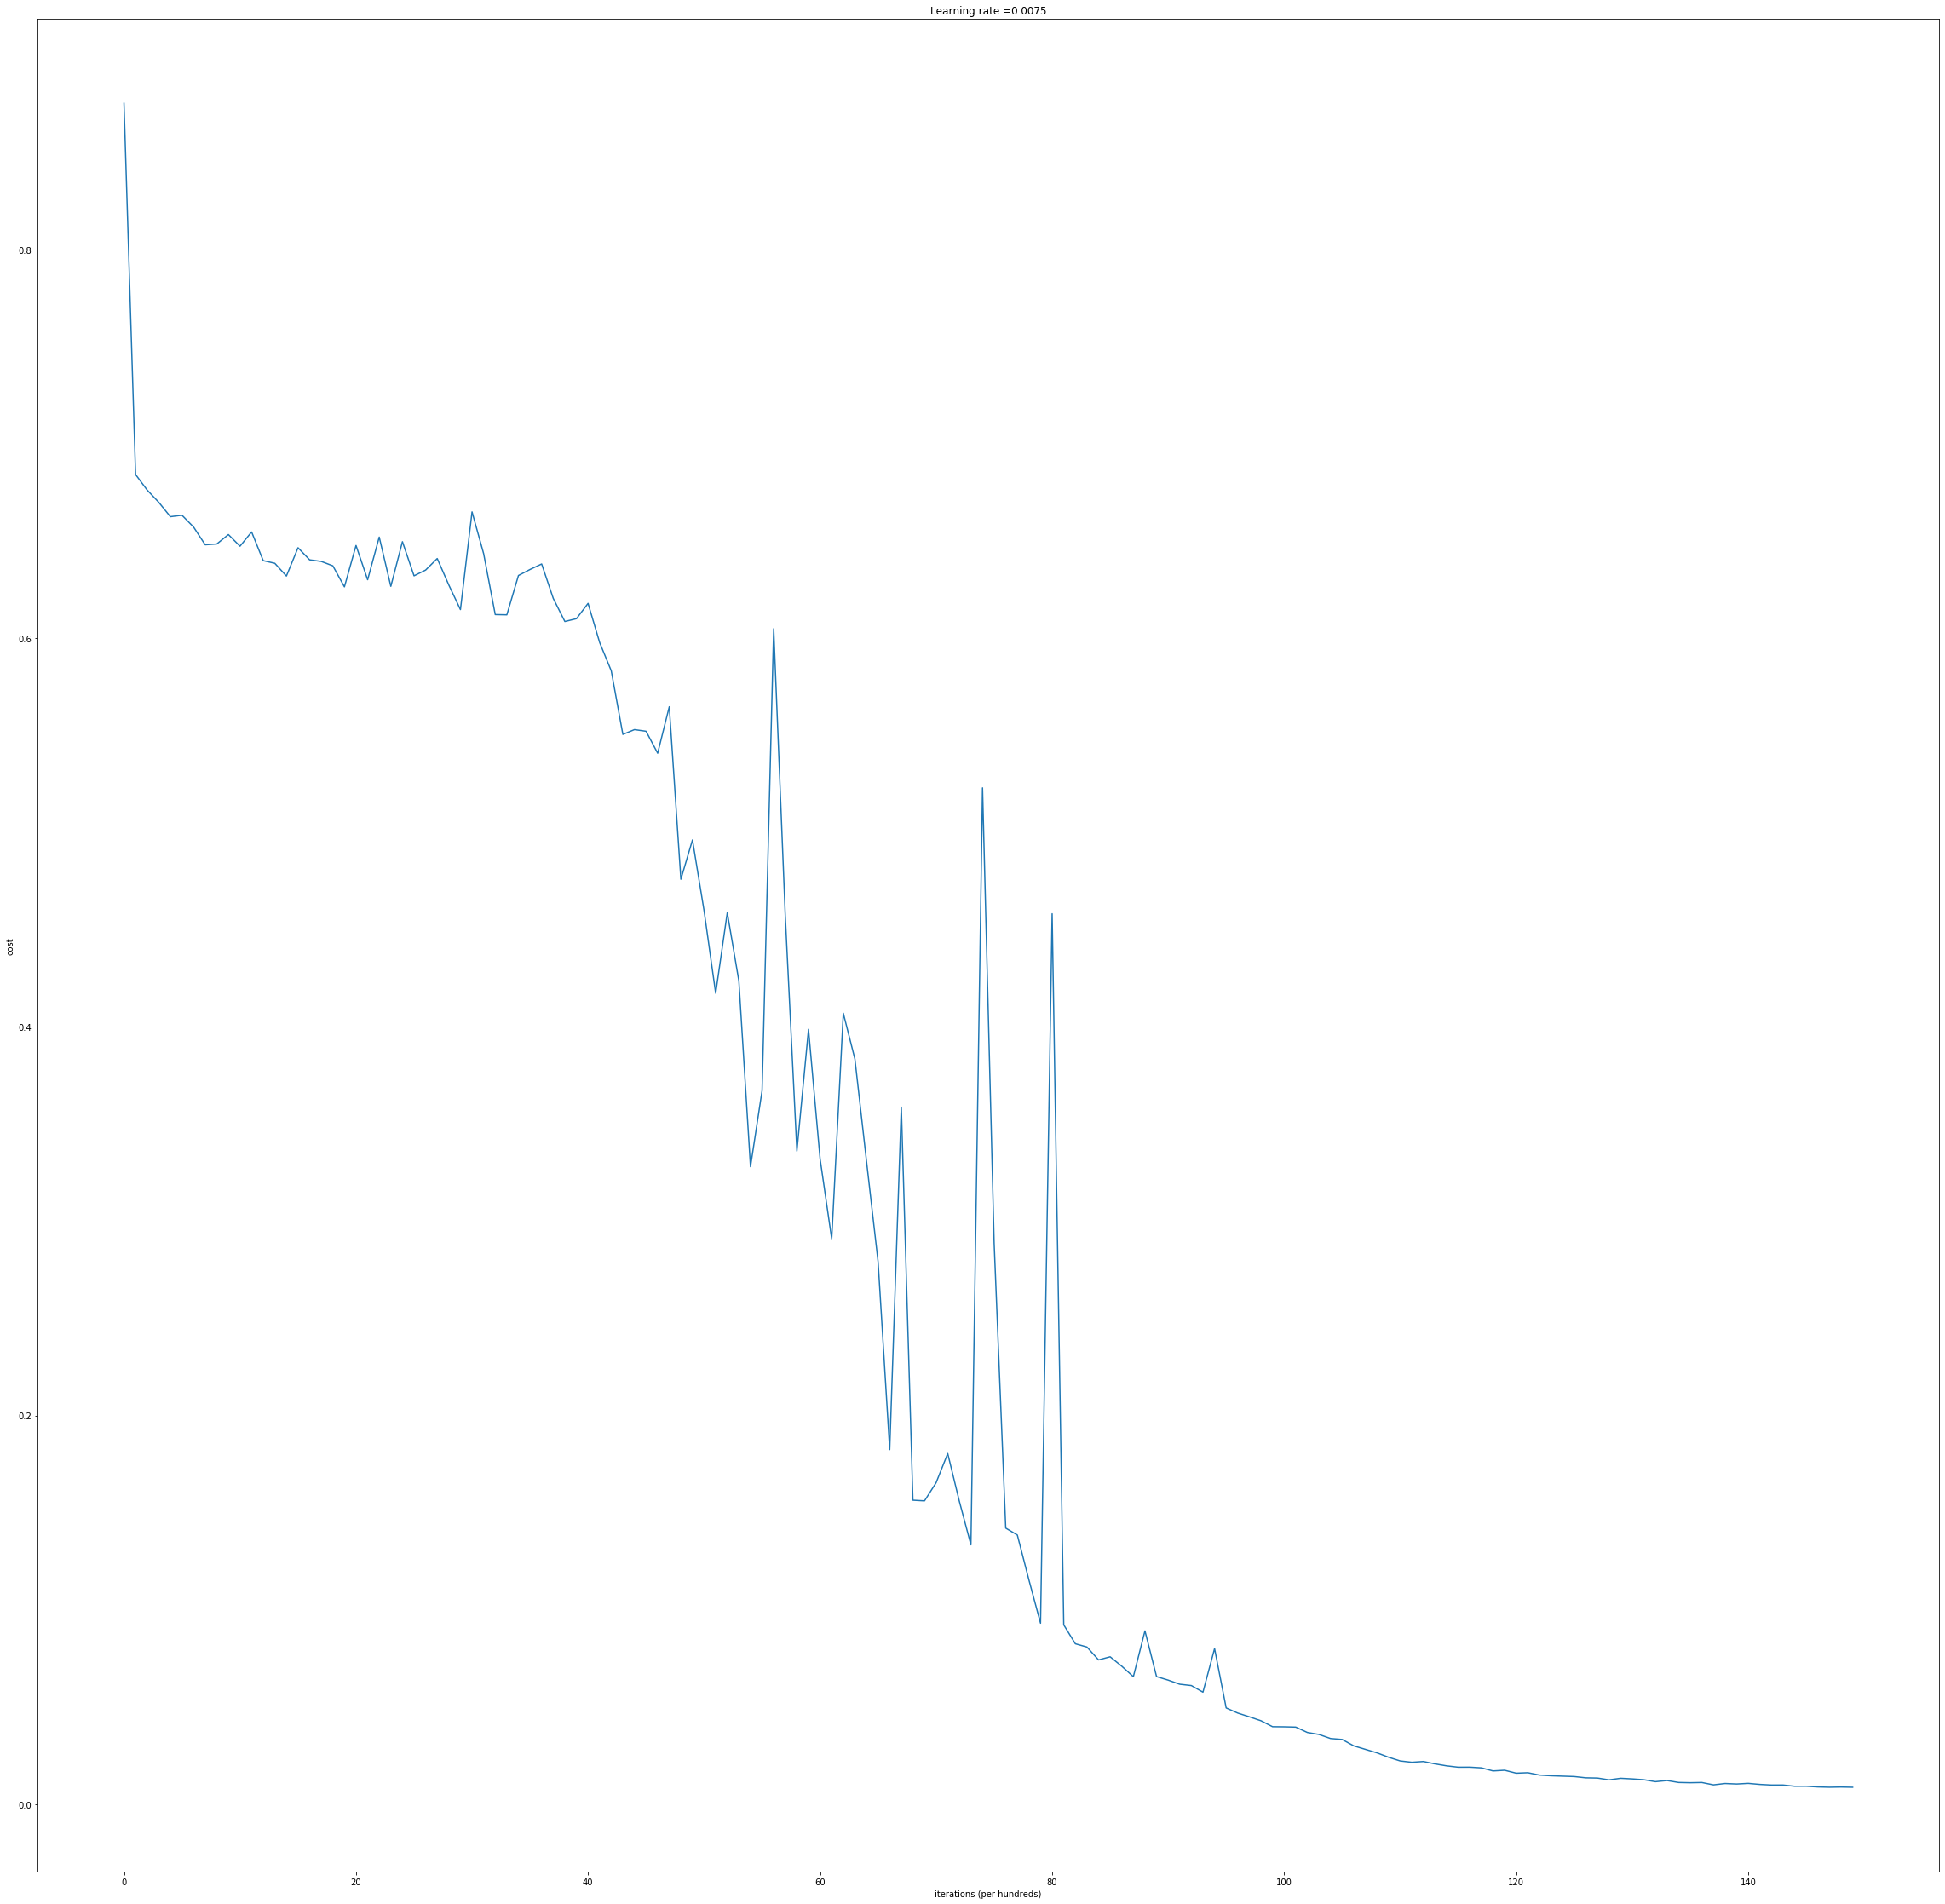

In [93]:
good

learning_rate:0.0075
minibatch_size:32
num_epochs:500
lambd:0.0
keep_prob:1
beta1:0
beta2:0
epsilon:0
L:4
m:209
n_x:12288
n_y:1
W1(20, 12288)
W1float64
vdW1(20, 12288)
vdW1float64
sdW1(20, 12288)
sdW1float64
b1(20, 1)
b1float64
vdb1(20, 1)
vdb1float64
sdb1(20, 1)
sdb1float64
W2(7, 20)
W2float64
vdW2(7, 20)
vdW2float64
sdW2(7, 20)
sdW2float64
b2(7, 1)
b2float64
vdb2(7, 1)
vdb2float64
sdb2(7, 1)
sdb2float64
W3(5, 7)
W3float64
vdW3(5, 7)
vdW3float64
sdW3(5, 7)
sdW3float64
b3(5, 1)
b3float64
vdb3(5, 1)
vdb3float64
sdb3(5, 1)
sdb3float64
W4(1, 5)
W4float64
vdW4(1, 5)
vdW4float64
sdW4(1, 5)
sdW4float64
b4(1, 1)
b4float64
vdb4(1, 1)
vdb4float64
sdb4(1, 1)
sdb4float64
loss_value: 1.3554176915599139
loss_value: 0.8994528437682121
loss_value: 0.6919389392944921
loss_value: 0.6911268762866843
loss_value: 0.690314875486643
loss_value: 0.6918769863382219
loss_value: 0.6944696681228089
Cost after epochs 0: 0.816371
loss_value: 0.693601787704077
loss_value: 0.6906481102828894
loss_value: 0.6912707885

loss_value: 0.6854382212775328
loss_value: 0.6500619617524989
loss_value: 0.6588057213832823
loss_value: 0.6052904590355563
loss_value: 0.6854772474752862
loss_value: 0.6585088104561913
loss_value: 0.6780594481514716
loss_value: 0.6403816244886054
loss_value: 0.6129665567515172
loss_value: 0.6580983615939484
loss_value: 0.6580287083106102
loss_value: 0.703927112953033
loss_value: 0.6396784747525204
loss_value: 0.7300026172337676
loss_value: 0.685530823896304
loss_value: 0.6763670321571369
loss_value: 0.6580241183953424
loss_value: 0.6303690349003097
loss_value: 0.6763091624953239
loss_value: 0.6577915933448302
loss_value: 0.5905615858598726
loss_value: 0.6387128763750369
loss_value: 0.6479291082959653
loss_value: 0.6761792745433622
loss_value: 0.6856405489195754
loss_value: 0.6383349642762797
loss_value: 0.6666460526441836
loss_value: 0.641978765749379
loss_value: 0.6952427401438768
loss_value: 0.6379359346206518
loss_value: 0.676101810957461
loss_value: 0.6377069202901843
loss_value: 

loss_value: 0.6447717548809977
loss_value: 0.6497371717197878
loss_value: 0.6447617306859892
loss_value: 0.6785883373849668
loss_value: 0.6447653421520243
loss_value: 0.6616709030323085
loss_value: 0.6447609790796972
loss_value: 0.5770854512708878
loss_value: 0.6816440938848103
loss_value: 0.6277765435703411
loss_value: 0.6447145606671111
loss_value: 0.6956418990877277
loss_value: 0.5938620548342566
loss_value: 0.6616902112779065
loss_value: 0.6277078913546388
loss_value: 0.6817045109569048
loss_value: 0.6616904183359489
loss_value: 0.7466482323701142
loss_value: 0.5769880646851582
loss_value: 0.610728322339871
loss_value: 0.6787106916761687
loss_value: 0.6446901806757561
loss_value: 0.5536311491855237
loss_value: 0.6104923800655284
loss_value: 0.7130205628185405
loss_value: 0.5593059707515706
loss_value: 0.6617250059900242
loss_value: 0.6103542064618526
loss_value: 0.6788834347817795
loss_value: 0.7141509094167032
loss_value: 0.6617188379826888
loss_value: 0.6788190454631325
loss_valu

loss_value: 0.6255083023922192
loss_value: 0.6438757627819471
loss_value: 0.6806600055429389
loss_value: 0.6492857614351453
Cost after epochs 150: 0.644665
loss_value: 0.5887462428763647
loss_value: 0.5517967927772884
loss_value: 0.6807822483822052
loss_value: 0.6438487729507416
loss_value: 0.7545935423138952
loss_value: 0.6438711779933943
loss_value: 0.6492822384116715
loss_value: 0.5334376214399579
loss_value: 0.6623132865731525
loss_value: 0.699241289845099
loss_value: 0.5700995177090775
loss_value: 0.6068665396375732
loss_value: 0.7548849842857639
loss_value: 0.7187405852635189
loss_value: 0.5886252292144339
loss_value: 0.625401649289234
loss_value: 0.6623082912009427
loss_value: 0.6807620932749343
loss_value: 0.6622948266535309
loss_value: 0.6807259757107147
loss_value: 0.5799412668960219
loss_value: 0.6992227801219681
loss_value: 0.533267523738755
loss_value: 0.7548217177844487
loss_value: 0.6622943885499931
loss_value: 0.6069887597080306
loss_value: 0.6069281744082549
loss_value

loss_value: 0.6628188141458093
loss_value: 0.585994222800174
loss_value: 0.6820772992507429
loss_value: 0.6130787777059571
loss_value: 0.6243611924891452
loss_value: 0.5858418287222753
loss_value: 0.6821612076488143
loss_value: 0.6435939720887508
loss_value: 0.6435934728080634
loss_value: 0.739950293009855
loss_value: 0.5407139564023006
loss_value: 0.7014306792200911
loss_value: 0.7205999446820507
loss_value: 0.5667627864215073
loss_value: 0.6243411594395643
loss_value: 0.5857892013942787
loss_value: 0.6821903715272023
loss_value: 0.6129642672127593
loss_value: 0.5663780958813556
loss_value: 0.6822699939636788
loss_value: 0.6629085885667391
loss_value: 0.720859033302781
loss_value: 0.5857537699043572
loss_value: 0.6242712238122
loss_value: 0.6856432210001994
loss_value: 0.6435858432080133
loss_value: 0.64358538349779
loss_value: 0.701512844357853
loss_value: 0.6243111496341078
loss_value: 0.6242956627498215
loss_value: 0.5663638218576283
loss_value: 0.7585366388226196
loss_value: 0.643

loss_value: 0.6435227411597111
loss_value: 0.6435225889103497
loss_value: 0.6863780940278419
loss_value: 0.643525086646516
loss_value: 0.7222051902090024
loss_value: 0.6042717625824785
loss_value: 0.5845721367851395
loss_value: 0.6041537714609149
loss_value: 0.6632275240623314
loss_value: 0.72347113290003
loss_value: 0.6828390131997026
loss_value: 0.623892801218549
loss_value: 0.6238793095247714
loss_value: 0.6631864230469611
loss_value: 0.6238762628177598
loss_value: 0.6435258124969748
loss_value: 0.6493092602438102
loss_value: 0.6631883847850233
loss_value: 0.7024869567171544
loss_value: 0.6042849458877089
loss_value: 0.7024646660537801
loss_value: 0.604301487019276
loss_value: 0.6238912405604572
loss_value: 0.5753313333394894
loss_value: 0.6828981344418804
loss_value: 0.6238573305283313
loss_value: 0.6041642837035412
loss_value: 0.5844147652641548
loss_value: 0.6237823725065801
loss_value: 0.722502748676067
loss_value: 0.6864093092297049
loss_value: 0.7025748542724017
loss_value: 0.

loss_value: 0.6435105520267526
loss_value: 0.7227215940742908
loss_value: 0.584229845229435
loss_value: 0.6039226640384561
loss_value: 0.7612420313479954
loss_value: 0.6435152310880563
loss_value: 0.5842478087651308
loss_value: 0.683088864377771
loss_value: 0.6435138100402614
loss_value: 0.6435137013625793
loss_value: 0.7028253356404424
loss_value: 0.5750073975253243
loss_value: 0.643512874899894
loss_value: 0.6632915675491374
loss_value: 0.5842058508741983
loss_value: 0.6039064973662158
loss_value: 0.6435085155361613
loss_value: 0.7029835914029166
loss_value: 0.6865930092765221
loss_value: 0.7226028406734558
loss_value: 0.6237865344981665
loss_value: 0.6830023290236125
loss_value: 0.702687559888796
loss_value: 0.5844446619234435
loss_value: 0.5843422017385482
loss_value: 0.5749422246591036
loss_value: 0.5841233097608249
loss_value: 0.6633367217753887
loss_value: 0.6236900060232069
loss_value: 0.6435079567630411
loss_value: 0.6831706652246523
loss_value: 0.6435096800354085
loss_value: 

loss_value: 0.5835558612851556
loss_value: 0.583457460923493
loss_value: 0.7236746934586616
loss_value: 0.7035056813448483
loss_value: 0.6117779030972422
loss_value: 0.5235615521611907
loss_value: 0.7437604702073893
loss_value: 0.6634971903190415
loss_value: 0.623506324689849
loss_value: 0.6234946791370537
loss_value: 0.7035343924689235
loss_value: 0.6117619923423511
loss_value: 0.6634954805675009
loss_value: 0.6834747634135514
loss_value: 0.6235299091907709
loss_value: 0.6235181509487595
loss_value: 0.643496974341434
loss_value: 0.58352378271731
loss_value: 0.7247665356691176
loss_value: 0.5835549820119499
loss_value: 0.7235483246303946
loss_value: 0.6634692584711205
loss_value: 0.6035759743935261
loss_value: 0.6235143299172501
loss_value: 0.7234733875984177
loss_value: 0.5366951670961422
loss_value: 0.6635056493625398
loss_value: 0.6634960289887237
loss_value: 0.6634864566315295
loss_value: 0.5835593903631511
loss_value: 0.6635076317571744
loss_value: 0.6034933035580994
loss_value: 0

loss_value: 0.7239538138465919
loss_value: 0.6434936246549442
loss_value: 0.6033465544530969
loss_value: 0.5832079346711395
loss_value: 0.6115257943840905
loss_value: 0.703924216705507
loss_value: 0.6032676790668352
loss_value: 0.6233583119221726
loss_value: 0.623347374474391
loss_value: 0.6031811165374233
loss_value: 0.6434916598800304
loss_value: 0.7633653378584395
loss_value: 0.6636064595198862
loss_value: 0.5831821589287549
loss_value: 0.5428143551381028
loss_value: 0.7646237104884968
loss_value: 0.6837426722132642
loss_value: 0.6233885792876441
loss_value: 0.6494087190648288
loss_value: 0.6837168877825195
loss_value: 0.6836755178491076
loss_value: 0.6033530706077106
loss_value: 0.6033094436956397
loss_value: 0.6636058447872197
loss_value: 0.6233898893915484
loss_value: 0.6494083709725613
loss_value: 0.7038252424579774
loss_value: 0.6635727900392885
loss_value: 0.5632174307554392
loss_value: 0.6636043550035429
loss_value: 0.6635942423889792
loss_value: 0.6434931085154312
loss_value

loss_value: 0.5432655255787231
loss_value: 0.6434929005306895
loss_value: 0.623393524221515
loss_value: 0.744043731023229
loss_value: 0.6434941380963326
loss_value: 0.64939350696026
loss_value: 0.6434942210834806
loss_value: 0.5833276428322764
loss_value: 0.6434932020078821
loss_value: 0.6836690513153891
loss_value: 0.7036949798157153
loss_value: 0.6234592964080001
loss_value: 0.611655728633211
loss_value: 0.6434939243262956
loss_value: 0.723750703694504
loss_value: 0.543384371818598
loss_value: 0.7639469718592184
loss_value: 0.5634463087129236
loss_value: 0.6434942196690705
loss_value: 0.6116412553688448
loss_value: 0.6836391141235492
loss_value: 0.6635462391182685
loss_value: 0.603411309260534
loss_value: 0.6434939436110274
loss_value: 0.6836211678851704
loss_value: 0.6434946722637009
loss_value: 0.5362045368722761
loss_value: 0.6233926244889303
loss_value: 0.6032704287045297
loss_value: 0.5428296789698124
loss_value: 0.6838628789461828
loss_value: 0.6838207652338585
loss_value: 0.68

loss_value: 0.6233993882502521
loss_value: 0.6494058612497264
loss_value: 0.7440010955281849
loss_value: 0.5632984777946743
loss_value: 0.6033096912989432
loss_value: 0.6434925727492544
loss_value: 0.6636059493570037
loss_value: 0.6434928044819002
loss_value: 0.6494055276029301
loss_value: 0.7037941282317515
loss_value: 0.7037005451093794
loss_value: 0.6034198274607463
loss_value: 0.6234349875209313
loss_value: 0.6635637632876308
loss_value: 0.6033744737059745
loss_value: 0.5737994017644406
loss_value: 0.6434924628813938
loss_value: 0.5630181651150927
loss_value: 0.6233306548670475
loss_value: 0.7241790819812317
loss_value: 0.7038809475638171
loss_value: 0.6233949337201108
loss_value: 0.6115550884930532
loss_value: 0.6636182152696507
loss_value: 0.6233770103585301
loss_value: 0.5831133386191669
loss_value: 0.6838084005647989
loss_value: 0.6233548926576753
loss_value: 0.7039359104513953
loss_value: 0.6115429887378291
loss_value: 0.6434921805411219
loss_value: 0.6434921774736113
loss_val

loss_value: 0.6633965320558539
loss_value: 0.6832712778965774
loss_value: 0.5640512522040428
loss_value: 0.6634085655702741
loss_value: 0.6236059485257164
loss_value: 0.6634099545214249
loss_value: 0.6493550035782386
loss_value: 0.5241274846997611
loss_value: 0.6834186618442362
loss_value: 0.6833788153652365
loss_value: 0.6235821360830458
loss_value: 0.6634306933922207
loss_value: 0.7032622323430531
loss_value: 0.6119141781725645
loss_value: 0.7231297730878748
loss_value: 0.6236396186224908
loss_value: 0.5838736829065938
loss_value: 0.7828670438111998
loss_value: 0.6038352474625365
loss_value: 0.6037893716587173
loss_value: 0.5370868935697152


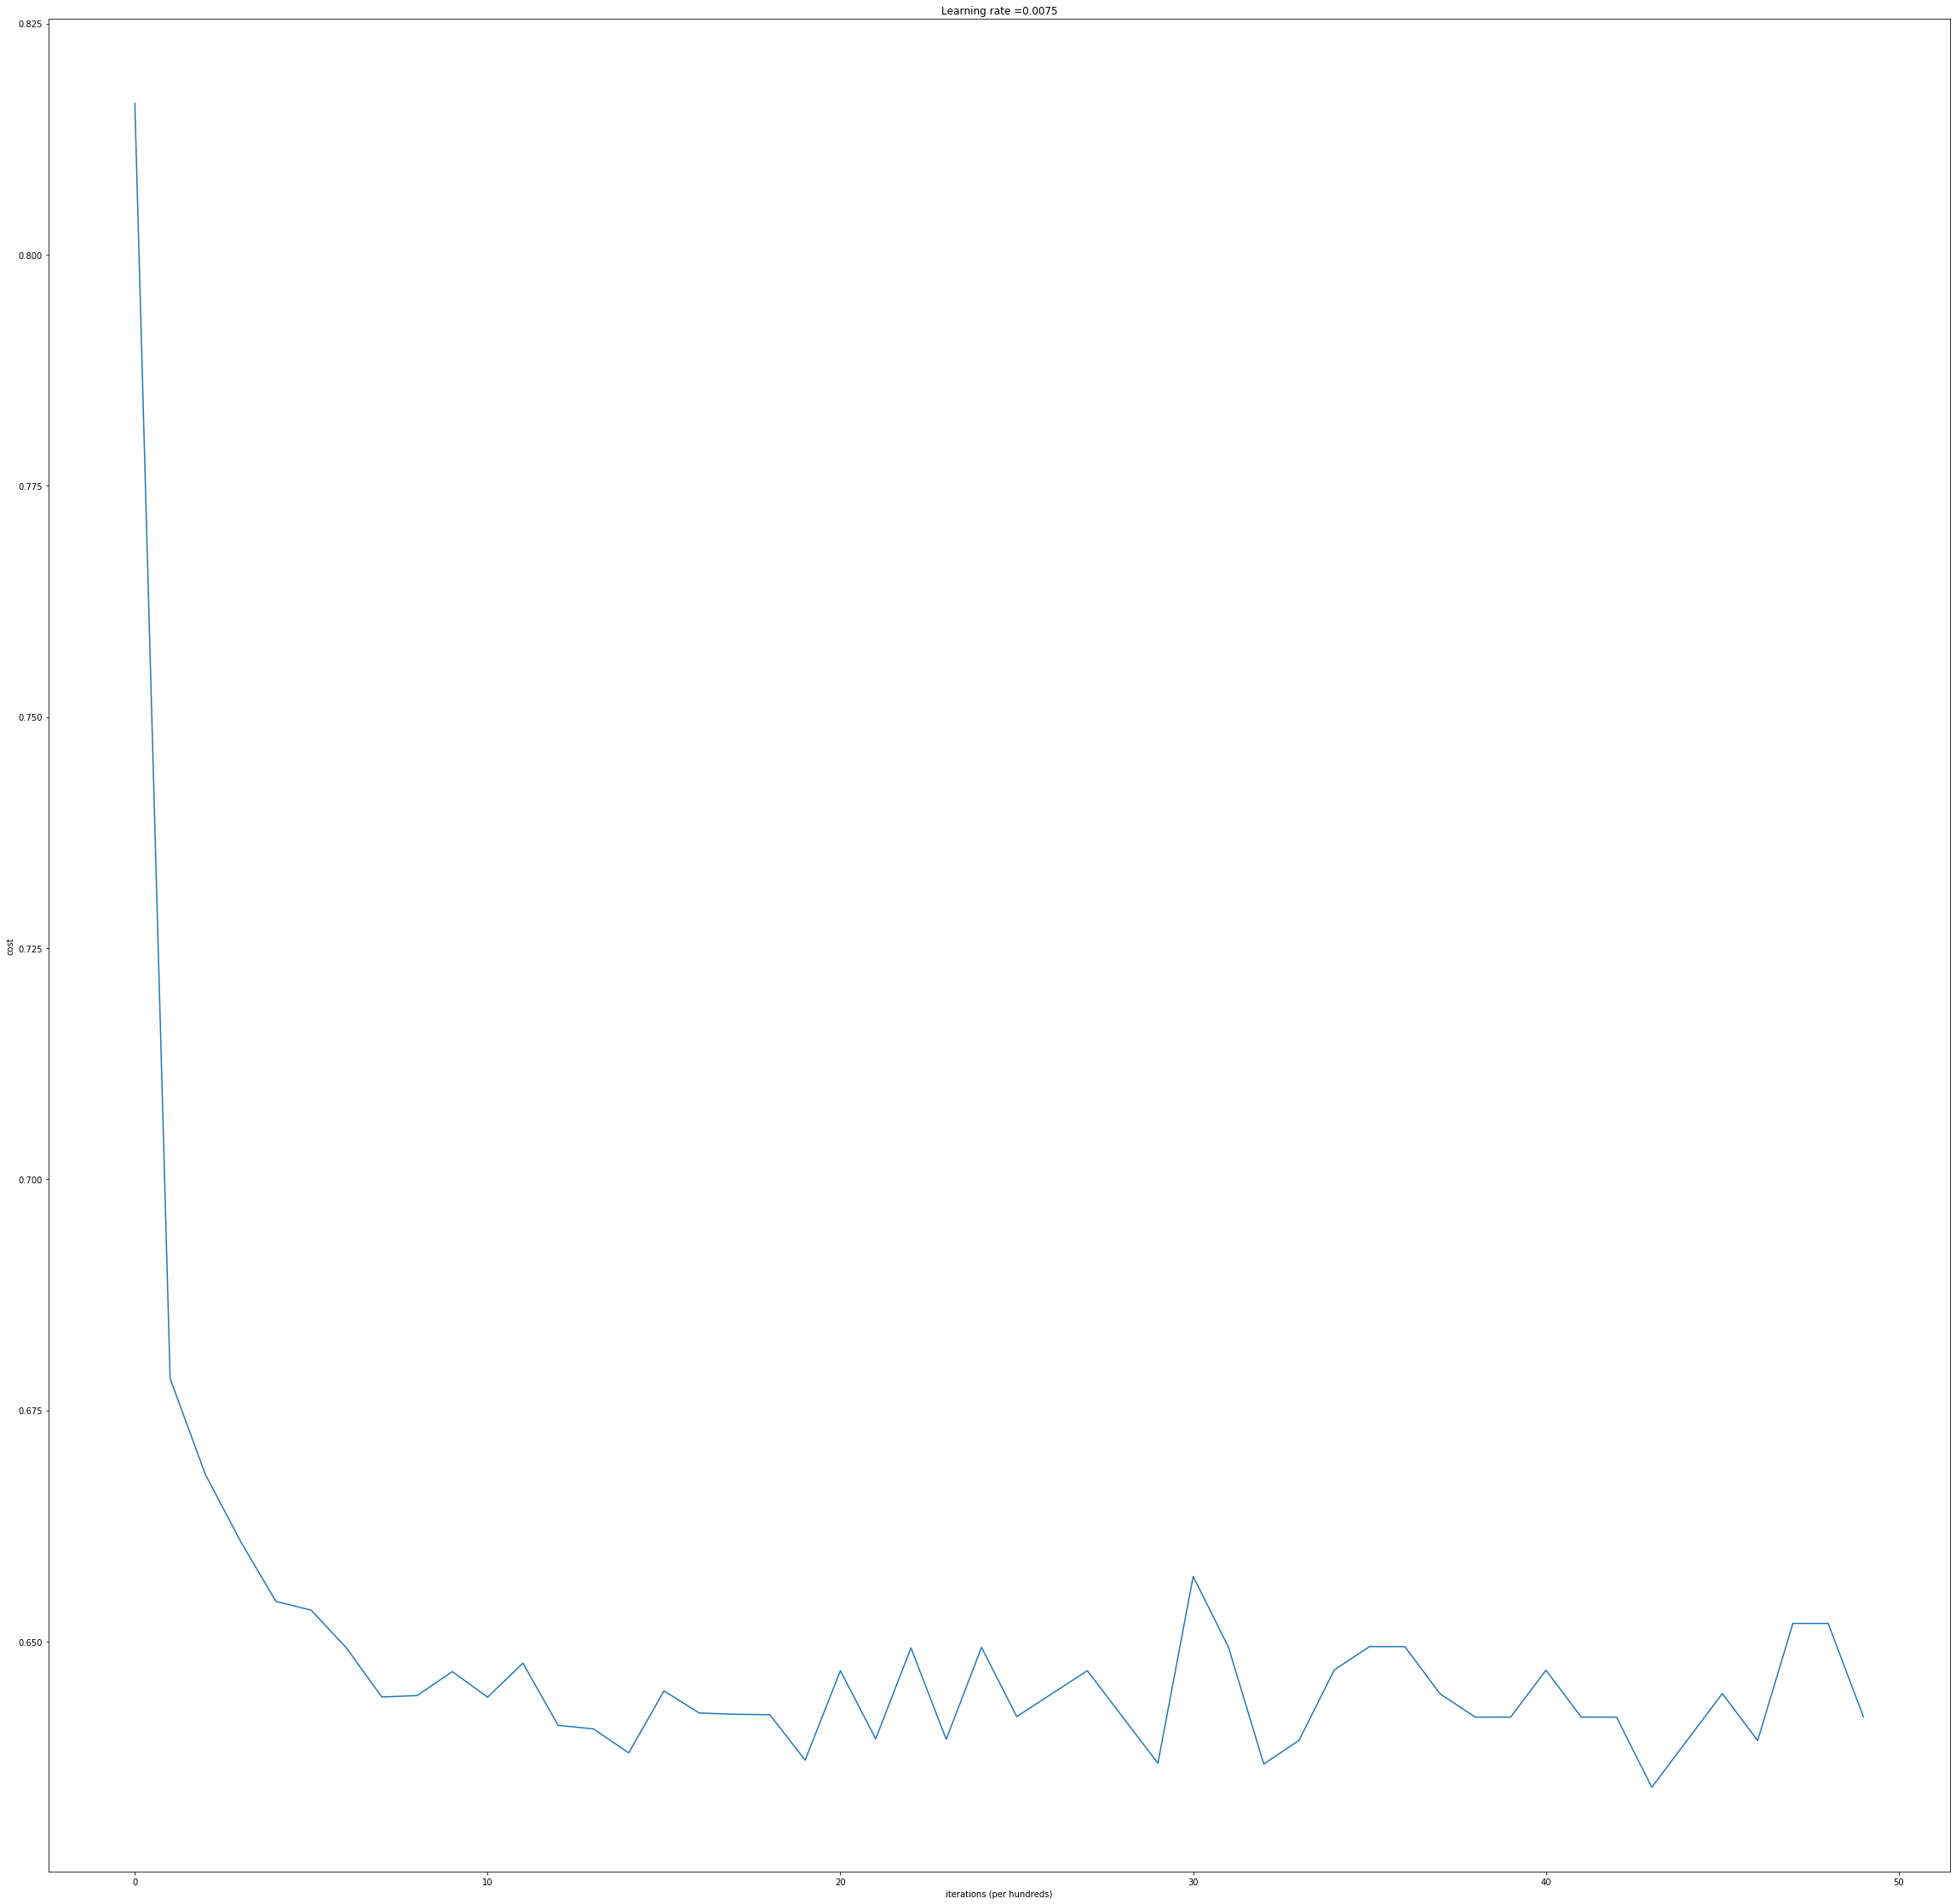

In [44]:
Xavier init
***********
learning_rate:0.0075
minibatch_size:32
num_epochs:1500
lambd:0.7
keep_prob:1
beta1:0
beta2:0
epsilon:0
L:4
m:209
n_x:12288
n_y:1
W1(20, 12288)
W1float64
vdW1(20, 12288)
vdW1float64
sdW1(20, 12288)
sdW1float64
b1(20, 1)
b1float64
vdb1(20, 1)
vdb1float64
sdb1(20, 1)
sdb1float64
W2(7, 20)
W2float64
vdW2(7, 20)
vdW2float64
sdW2(7, 20)
sdW2float64
b2(7, 1)
b2float64
vdb2(7, 1)
vdb2float64
sdb2(7, 1)
sdb2float64
W3(5, 7)
W3float64
vdW3(5, 7)
vdW3float64
sdW3(5, 7)
sdW3float64
b3(5, 1)
b3float64
vdb3(5, 1)
vdb3float64
sdb3(5, 1)
sdb3float64
W4(1, 5)
W4float64
vdW4(1, 5)
vdW4float64
sdW4(1, 5)
sdW4float64
b4(1, 1)
b4float64
vdb4(1, 1)
vdb4float64
sdb4(1, 1)
sdb4float64
[[-0.5433911  -0.02793285  0.70825305  1.26948814  0.0264432 ]]
Cost after epochs 0: 1.697628
Cost after epochs 50: 1.452670
Cost after epochs 100: 1.339905
Cost after epochs 150: 1.254705
Cost after epochs 200: 1.145035
Cost after epochs 250: 0.889063
Cost after epochs 300: 0.757709
Cost after epochs 350: 0.651647
Cost after epochs 400: 0.538860
Cost after epochs 450: 0.481979
Cost after epochs 500: 0.445554
Cost after epochs 550: 0.415995
Cost after epochs 600: 0.392944
Cost after epochs 650: 0.371457
Cost after epochs 700: 0.355442
Cost after epochs 750: 0.349044
Cost after epochs 800: 0.316547
Cost after epochs 850: 0.303409
Cost after epochs 900: 0.306516
Cost after epochs 950: 0.741361
Cost after epochs 1000: 0.303895
Cost after epochs 1050: 0.286397
Cost after epochs 1100: 0.275439
Cost after epochs 1150: 0.267925
Cost after epochs 1200: 0.259388
Cost after epochs 1250: 0.255115
Cost after epochs 1300: 0.251929
Cost after epochs 1350: 0.720197
Cost after epochs 1400: 0.264092
Cost after epochs 1450: 0.553787

SyntaxError: invalid syntax (<ipython-input-44-86c16686a7d7>, line 1)

In [ ]:
learning_rate:0.0075
minibatch_size:32
num_epochs:1500
lambd:0.7
keep_prob:1
beta1:0
beta2:0
epsilon:0
L:4
m:209
n_x:12288
n_y:1
W1(20, 12288)
W1float64
vdW1(20, 12288)
vdW1float64
sdW1(20, 12288)
sdW1float64
b1(20, 1)
b1float64
vdb1(20, 1)
vdb1float64
sdb1(20, 1)
sdb1float64
W2(7, 20)
W2float64
vdW2(7, 20)
vdW2float64
sdW2(7, 20)
sdW2float64
b2(7, 1)
b2float64
vdb2(7, 1)
vdb2float64
sdb2(7, 1)
sdb2float64
W3(5, 7)
W3float64
vdW3(5, 7)
vdW3float64
sdW3(5, 7)
sdW3float64
b3(5, 1)
b3float64
vdb3(5, 1)
vdb3float64
sdb3(5, 1)
sdb3float64
W4(1, 5)
W4float64
vdW4(1, 5)
vdW4float64
sdW4(1, 5)
sdW4float64
b4(1, 1)
b4float64
vdb4(1, 1)
vdb4float64
sdb4(1, 1)
sdb4float64
[[-0.38423553 -0.01975151  0.50081053  0.89766368  0.01869816]]
Cost after epochs 0: 1.146061
Cost after epochs 50: 1.036892
Cost after epochs 100: 0.939034
Cost after epochs 150: 0.781804
Cost after epochs 200: 0.647574
Cost after epochs 250: 0.848596
Cost after epochs 300: 0.406260
Cost after epochs 350: 0.810736
Cost after epochs 400: 0.490216
Cost after epochs 450: 0.301127
Cost after epochs 500: 0.264717
Cost after epochs 550: 0.232978
Cost after epochs 600: 0.206335
Cost after epochs 650: 0.187649
Cost after epochs 700: 1.006774
Cost after epochs 750: 0.185484
Cost after epochs 800: 0.166464
Cost after epochs 850: 0.151638
Cost after epochs 900: 0.140844
Cost after epochs 950: 0.711007
Cost after epochs 1000: 1.117012
Cost after epochs 1050: 0.805594
Cost after epochs 1100: 0.742132
Cost after epochs 1150: 0.726383
Cost after epochs 1200: 0.709628
Cost after epochs 1250: 0.706508
Cost after epochs 1300: 0.691452
Cost after epochs 1350: 0.692759
Cost after epochs 1400: 0.675731
Cost after epochs 1450: 0.398864

In [ ]:
learning_rate:0.0075
minibatch_size:32
num_epochs:1500
lambd:0.0
keep_prob:1
beta1:0
beta2:0
epsilon:0
L:4
m:209
n_x:12288
n_y:1
W1(20, 12288)
W1float64
vdW1(20, 12288)
vdW1float64
sdW1(20, 12288)
sdW1float64
b1(20, 1)
b1float64
vdb1(20, 1)
vdb1float64
sdb1(20, 1)
sdb1float64
W2(7, 20)
W2float64
vdW2(7, 20)
vdW2float64
sdW2(7, 20)
sdW2float64
b2(7, 1)
b2float64
vdb2(7, 1)
vdb2float64
sdb2(7, 1)
sdb2float64
W3(5, 7)
W3float64
vdW3(5, 7)
vdW3float64
sdW3(5, 7)
sdW3float64
b3(5, 1)
b3float64
vdb3(5, 1)
vdb3float64
sdb3(5, 1)
sdb3float64
W4(1, 5)
W4float64
vdW4(1, 5)
vdW4float64
sdW4(1, 5)
sdW4float64
b4(1, 1)
b4float64
vdb4(1, 1)
vdb4float64
sdb4(1, 1)
sdb4float64
[[-0.38423553 -0.01975151  0.50081053  0.89766368  0.01869816]]
Cost after epochs 0: 0.708676
Cost after epochs 50: 0.650063
Cost after epochs 100: 0.567843
Cost after epochs 150: 0.448445
Cost after epochs 200: 0.310527
Cost after epochs 250: 0.438584
Cost after epochs 300: 0.140321
Cost after epochs 350: 0.117669
Cost after epochs 400: 0.103073
Cost after epochs 450: 0.106222
Cost after epochs 500: 0.090751
Cost after epochs 550: 0.088440
Cost after epochs 600: 0.086270
Cost after epochs 650: 0.085111
Cost after epochs 700: 0.084887
Cost after epochs 750: 0.096599
Cost after epochs 800: 0.096856
Cost after epochs 850: 0.083092
Cost after epochs 900: 0.083457
Cost after epochs 950: 0.083125
Cost after epochs 1000: 0.082807
Cost after epochs 1050: 0.096390
Cost after epochs 1100: 0.096437
Cost after epochs 1150: 0.082504
Cost after epochs 1200: 0.096492
Cost after epochs 1250: 0.082452
Cost after epochs 1300: 0.082601
Cost after epochs 1350: 0.096250
Cost after epochs 1400: 0.082343
Cost after epochs 1450: 0.082638

In [ ]:
learning_rate:0.0075
minibatch_size:0
num_epochs:1500
lambd:0.7
keep_prob:1
beta1:0
beta2:0
epsilon:0
L:4
m:209
n_x:12288
n_y:1
W1(20, 12288)
W1float64
vdW1(20, 12288)
vdW1float64
sdW1(20, 12288)
sdW1float64
b1(20, 1)
b1float64
vdb1(20, 1)
vdb1float64
sdb1(20, 1)
sdb1float64
W2(7, 20)
W2float64
vdW2(7, 20)
vdW2float64
sdW2(7, 20)
sdW2float64
b2(7, 1)
b2float64
vdb2(7, 1)
vdb2float64
sdb2(7, 1)
sdb2float64
W3(5, 7)
W3float64
vdW3(5, 7)
vdW3float64
sdW3(5, 7)
sdW3float64
b3(5, 1)
b3float64
vdb3(5, 1)
vdb3float64
sdb3(5, 1)
sdb3float64
W4(1, 5)
W4float64
vdW4(1, 5)
vdW4float64
sdW4(1, 5)
sdW4float64
b4(1, 1)
b4float64
vdb4(1, 1)
vdb4float64
sdb4(1, 1)
sdb4float64
[[-0.38423553 -0.01975151  0.50081053  0.89766368  0.01869816]]
Cost after epochs 0: 0.831299
Cost after epochs 50: 0.742033
Cost after epochs 100: 0.731358
Cost after epochs 150: 0.720953
Cost after epochs 200: 0.715560
Cost after epochs 250: 0.692843
Cost after epochs 300: 0.692887
Cost after epochs 350: 0.658345
Cost after epochs 400: 0.641397
Cost after epochs 450: 0.607680
Cost after epochs 500: 0.600734
Cost after epochs 550: 0.571821
Cost after epochs 600: 0.602626
Cost after epochs 650: 0.503919
Cost after epochs 700: 0.504533
Cost after epochs 750: 0.484661
Cost after epochs 800: 0.490117
Cost after epochs 850: 0.424652
Cost after epochs 900: 0.422890
Cost after epochs 950: 0.378501
Cost after epochs 1000: 0.366472
Cost after epochs 1050: 0.338909
Cost after epochs 1100: 0.326538
Cost after epochs 1150: 0.314619
Cost after epochs 1200: 0.295571
Cost after epochs 1250: 0.279296
Cost after epochs 1300: 0.280063
Cost after epochs 1350: 0.255795
Cost after epochs 1400: 0.246482
Cost after epochs 1450: 0.237007

In [94]:
def predict_new(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    L = len(layers_dims) -1            # number of layers in the network
    print ("L : " + str(L))
   
    m = X.shape[1]
    p = np.zeros((1,m))
    
    # Forward propagation
    PAL, caches, caches_D = L_model_forward(L, X, parameters, 0)

    
    # convert probas to 0/1 predictions
    for i in range(0, PAL.shape[1]):
        if PAL[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    print ("predictions: " + str(p))
    print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

In [95]:
pred_train = predict_new(train_x, train_y, parameters)

L : 4
predictions: [[0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
  0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0.
  0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0.
  1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
  0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
true labels: [[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0

In [96]:
pred_test = predict_new(test_x, test_y, parameters)

L : 4
predictions: [[1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.
  1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
  1. 0.]]
true labels: [[1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0
  0 1 0 0 1 1 1 0 0 0 1 1 1 0]]
Accuracy: 0.76


In [97]:
def print_mislabeled_images_new(classes, X, y, p):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))


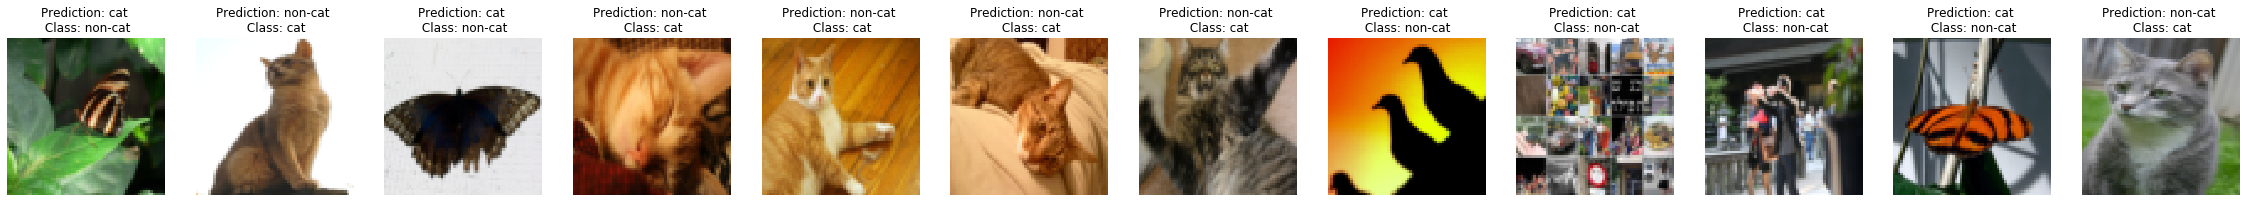

In [98]:
print_mislabeled_images_new(classes, test_x, test_y, pred_test)

1.4.1
original shape:  (1044, 1565, 3)
new shape:  (12288, 1)
L : 4
predictions: [[1.]]
true labels: [1]
Accuracy: 1.0
y = 1.0, your L-layer model predicts a "cat" picture.


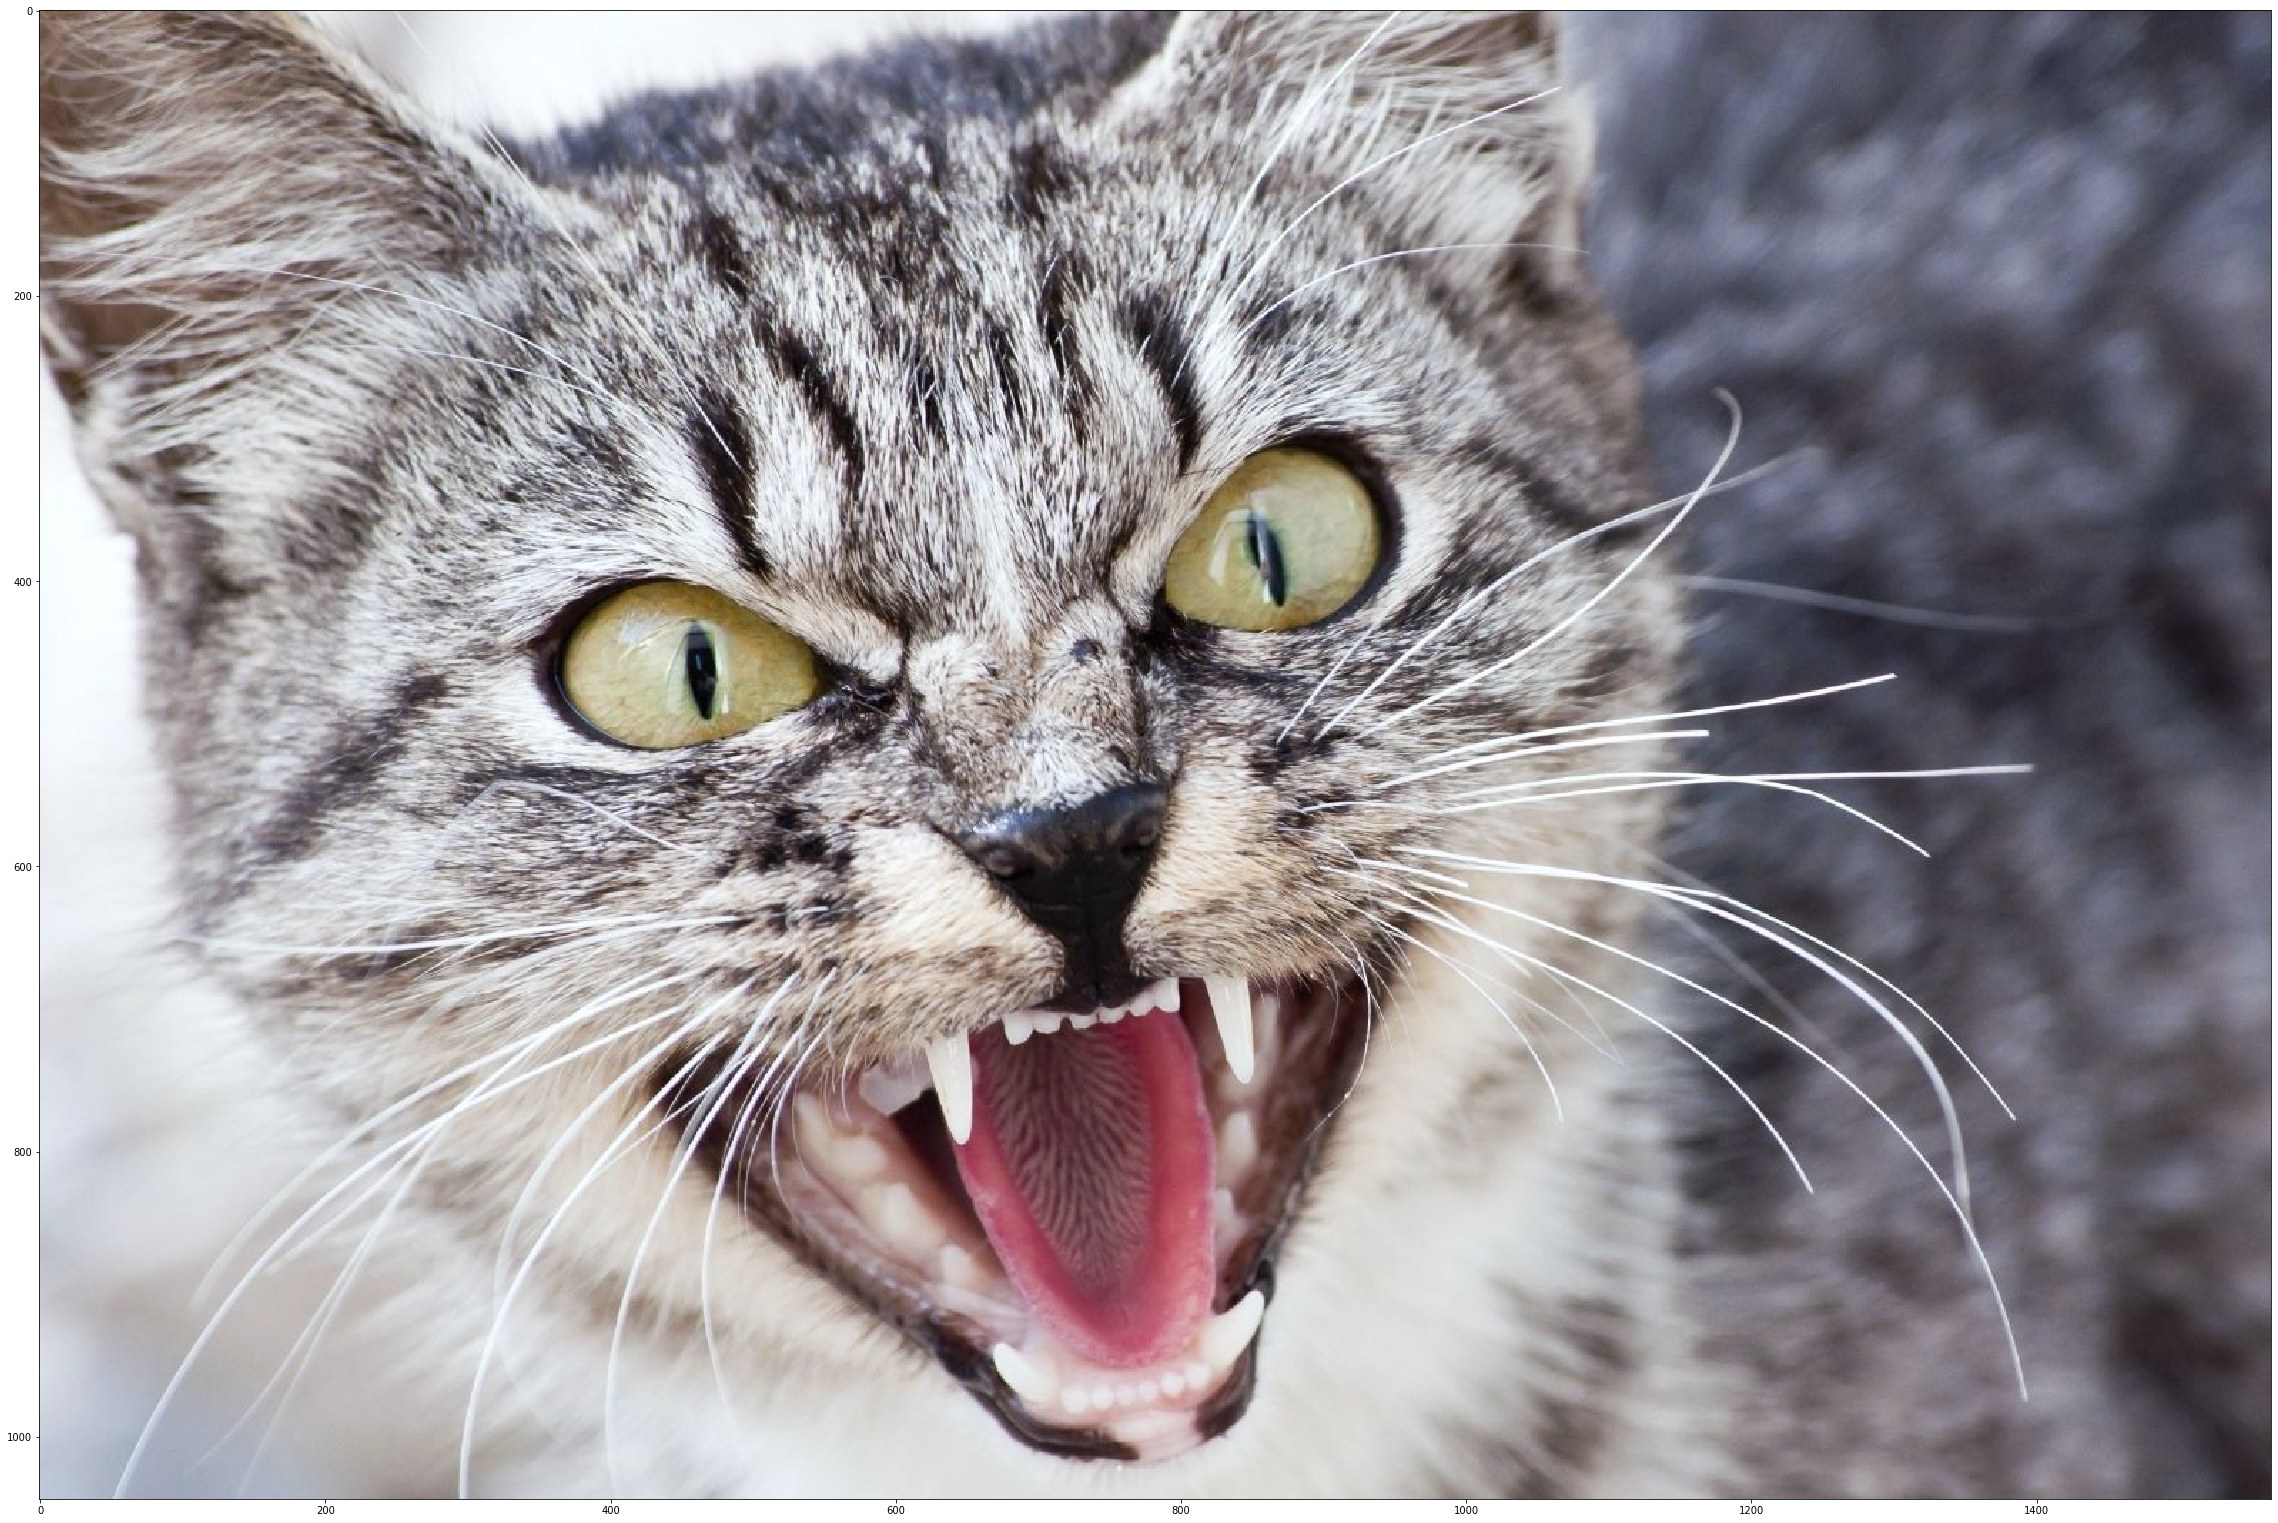

In [103]:
import imageio
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
print(scipy.__version__)

my_image = "chat4.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)
fname = "images/" + my_image
im = imageio.imread(fname, as_gray=False)
print("original shape: " , im.shape)
image_resized = resize(im, (64, 64),preserve_range=True).reshape((64*64*3,1))
image_resized = image_resized/255.
print("new shape: ", image_resized.shape)
my_predicted_image = predict_new(image_resized, my_label_y, parameters)
plt.imshow(im)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")